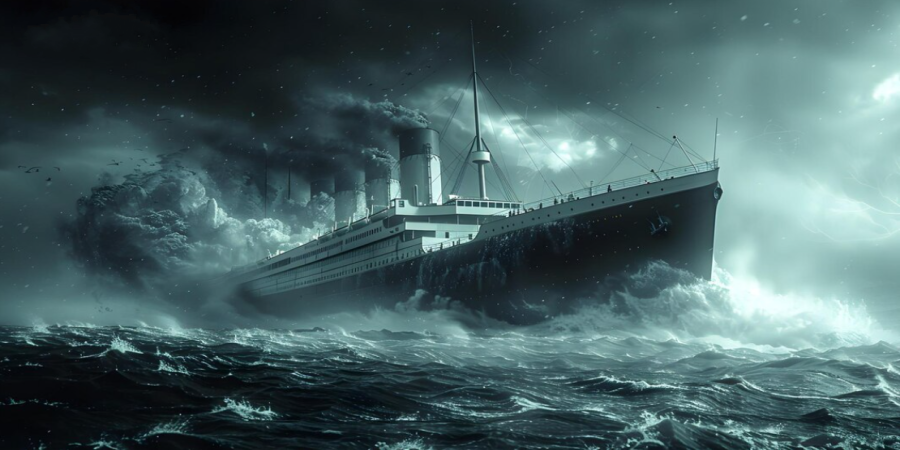

# **Exploring the World's Most Renowned Shipwreck 🚢**

---


When you begin participating in this competition and make your first submission, you may notice many participants with surprisingly high scores, including around 300-350 perfect scores of 1.00. This might be discouraging, making you feel as though your entry was insufficient or that you're not competitive enough. However, it's important to realize that these high leaderboard scores are artificially created because the actual survival data, which are missing from the test set, can be found online.

Other participants achieved high scores by labeling all females as survivors, as women had a higher survival rate on the Titanic. While this may rank well temporarily, it does not truly reflect a model's capability to generalize while it also indicates a lack of thoughtful model design.

The real goal of competing in machine learning is to build models that perform well on new, unseen data while staying fair and explainable. Shortcuts might boost scores temporarily, but in real-world applications, models need to find real patterns and provide reliable results. It's always more beneficial to focus on building strong models through testing and experimentation rather than just seeking quick ways to get high leaderboard scores. 

Therefore, **this notebook will guide you in building realistic models that can help you reach the top 10% of the leaderboard, while also enhancing your machine learning skills in a more effective and principled manner**. 


# **PART 1 - Data Exploration and Insights**

---


## **1.1 Load the required libraries and import the Titanic dataset from a CSV files**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set the file paths for the training and test datasets.
# Replace the placeholders below with the paths to your local 'train.csv' and 'test.csv' files.
train = 'path_to_train_file/train.csv'
test = 'path_to_test_file/test.csv'

In [8]:
# Convert the dataset into a Pandas DataFrame.
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

## **1.2 Exploratory Data Analysis (EDA)**

### **1.2.1 Overview of Passenger data**

In [11]:
# Check the total number of passengers in the train dataset
total_passengers = len(train_df)

print(f"Total number of passengers in the dataset: {total_passengers}\n")

# Count the number of passengers who survived(1) and those who did not(0)
survival_counts = train_df['Survived'].value_counts()
print(survival_counts)

Total number of passengers in the dataset: 891

Survived
0    549
1    342
Name: count, dtype: int64


In [12]:
# Survival rate
survived_passengers = len(train_df[(train_df['Survived'] == 1)])
total_survival_rate = survived_passengers / total_passengers

print(f'Survival Rate: {total_survival_rate:.3f}')

Survival Rate: 0.384


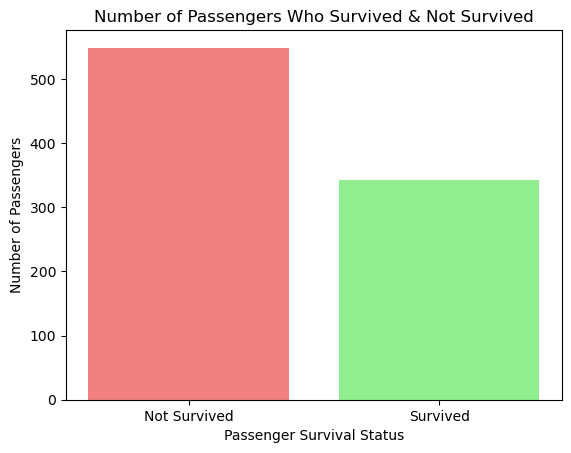

In [13]:
# Bar colors
colors = ['lightcoral', 'lightgreen']

# x axis --> Unique values sorted by their frequency in the dataset (most common to least common) - 0,1 since there are more passengers that didnt survived
# y axis --> Frequency of each survival status (Survived - Not Survived) in the dataset
plt.bar(survival_counts.index, survival_counts.values, color=colors, align='center')

# Labels
plt.xlabel('Passenger Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived & Not Survived')
plt.xticks(ticks=[1, 0], labels=['Survived', 'Not Survived'])
plt.show()

### **1.2.2 Impact of Traveling Alone on Survival Rate**

Another aspect we can analyze from the dataset is how traveling alone impacted the survival rate of passengers

In [15]:
# Create a new column 'IsAlone'
# If Parch + SibSp is equal to 0 that means that the passenger is travelling alone
train_df['IsAlone'] = (train_df['Parch'] + train_df['SibSp'] == 0).astype(int)

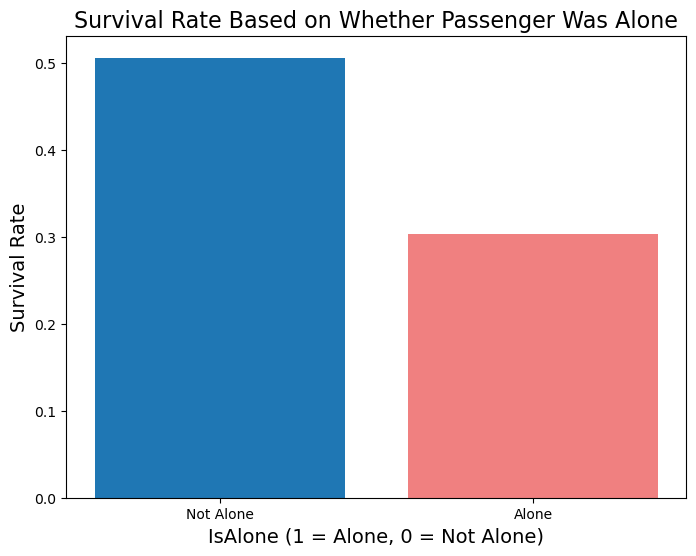

In [16]:
# Survival rate for passengers who were alone and not alone
survival_rate = train_df.groupby('IsAlone')['Survived'].mean().reset_index()


colors = ['#1f77b4', 'lightcoral']

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(x=survival_rate['IsAlone'], height=survival_rate['Survived'], color=['#1f77b4', 'lightcoral'])
plt.title('Survival Rate Based on Whether Passenger Was Alone', fontsize=16)
plt.xlabel('IsAlone (1 = Alone, 0 = Not Alone)', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

### **1.2.3 Impact of Passenger Class on Survival Rate**

In [18]:
# Survivors by Class
survived_1st_class = train_df[(train_df['Survived']== 1) & (train_df['Pclass']== 1)]
survived_2nd_class = train_df[(train_df['Survived']== 1) & (train_df['Pclass']== 2)]
survived_3rd_class = train_df[(train_df['Survived']== 1) & (train_df['Pclass']== 3)]

print('----- Survivors by Class -----')
print(f'Survived in 1st class: {len(survived_1st_class)} passengers')
print(f'Survived in 2nd class: {len(survived_2nd_class)} passengers')
print(f'Survived in 3rd class: {len(survived_3rd_class)} passengers')

----- Survivors by Class -----
Survived in 1st class: 136 passengers
Survived in 2nd class: 87 passengers
Survived in 3rd class: 119 passengers


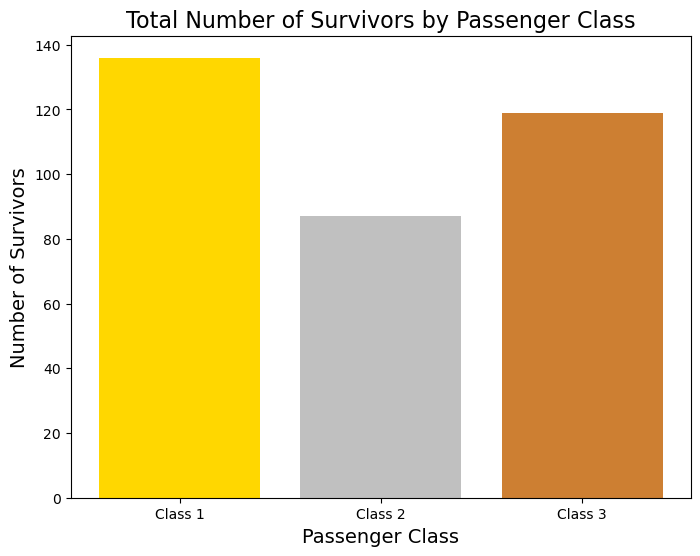

In [19]:
# Total number of survivors in each class
survivors_by_class = train_df[train_df['Survived'] == 1].groupby('Pclass').size().reset_index(name='count')

# Define the colors corresponding to each class
colors = {1: '#FFD700', 2: '#C0C0C0', 3: '#CD7F32'}

# Plot the total number of survivors in each class
plt.figure(figsize=(8, 6))
plt.bar(x=survivors_by_class['Pclass'], height=survivors_by_class['count'], color=[colors[pclass] for pclass in survivors_by_class['Pclass']])
plt.title('Total Number of Survivors by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Survivors', fontsize=14)
plt.xticks([1, 2, 3], ['Class 1', 'Class 2', 'Class 3'])  # Optional: Customize x-tick labels
plt.show()

At this point, it might seem that 3rd class had more survivors than the 2nd class. However, to determine if that's true based on survival rates, the total number of passengers in each class needs to be checked, and the proportion of survivors calculated.

In [21]:
# Total passengers in each class
total_pass_1st_class = train_df[(train_df['Pclass']== 1)]
total_pass_2nd_class = train_df[(train_df['Pclass']== 2)]
total_pass_3rd_class = train_df[(train_df['Pclass']== 3)]

print('----- Total Passengers by Class -----')
print(f'1st class: {len(total_pass_1st_class)}')
print(f'2nd class: {len(total_pass_2nd_class)}')
print(f'3rd class: {len(total_pass_3rd_class)}')

----- Total Passengers by Class -----
1st class: 216
2nd class: 184
3rd class: 491


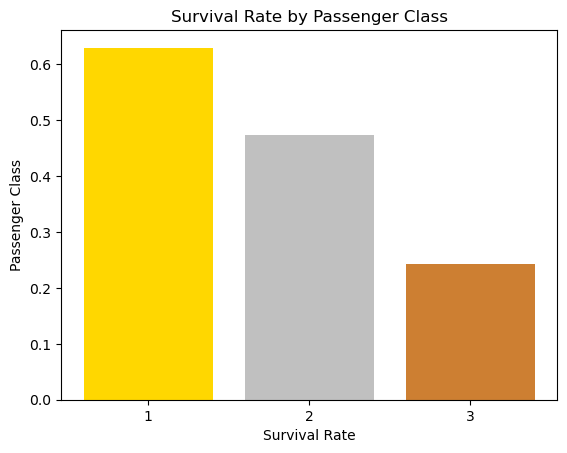

In [22]:
# Proportion of the survival rates in each class
survival_rate_1st_class = len(survived_1st_class) / len(total_pass_1st_class)
survival_rate_2nd_class = len(survived_2nd_class) / len(total_pass_2nd_class)
survival_rate_3rd_class = len(survived_3rd_class) / len(total_pass_3rd_class)

# Create a new dataframe to ensure that each passenger class corresponds to its respective survival rate
survival_rates = pd.DataFrame({
    'Pclass': ['1', '2', '3'],
    'Survival Rate': [survival_rate_1st_class, survival_rate_2nd_class, survival_rate_3rd_class]
})

# Colors
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# Plot the survival rates using a bar chart as before
plt.bar(survival_rates['Pclass'], survival_rates['Survival Rate'], color=colors)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Survival Rate')
plt.ylabel('Passenger Class')
plt.show()

As a result, the survival rates are:
- 1st class: 62.96%
- 2nd class: 47.28%
- 3rd class: 24.23%

This means that people in 1st class had a higher chance of surviving compared to the other classes, likely because their cabins were located higher on the ship.

### **1.2.4 Impact of Gender on Survival Rate**

In [25]:
# Number of male and female on board
gender_counts = train_df['Sex'].value_counts()
print(gender_counts)

Sex
male      577
female    314
Name: count, dtype: int64


In [26]:
# Males & Females on each class
males_1st_class = len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male')])
females_1st_class = len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female')])
males_2nd_class = len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male')])
females_2nd_class = len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female')])
males_3rd_class = len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male')])
females_3rd_class = len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female')])

# Total number of passengers in each class
total_1st_class = males_1st_class + females_1st_class
total_2nd_class = males_2nd_class + females_2nd_class
total_3rd_class = males_3rd_class + females_3rd_class

# Proportion of females in each class
proportion_females_1st_class = females_1st_class / total_1st_class if total_1st_class > 0 else 0
proportion_females_2nd_class = females_2nd_class / total_2nd_class if total_2nd_class > 0 else 0
proportion_females_3rd_class = females_3rd_class / total_3rd_class if total_3rd_class > 0 else 0

# Table with the proportion of females
print(f"{'Class':<10}{'Males':<10}{'Females':<10}{'Proportion of Females':<25}")
print("-" * 51)
print(f"1st class  {males_1st_class:<10}{females_1st_class:<10}{proportion_females_1st_class:<25.2f}")
print(f"2nd class  {males_2nd_class:<10}{females_2nd_class:<10}{proportion_females_2nd_class:<25.2f}")
print(f"3rd class  {males_3rd_class:<10}{females_3rd_class:<10}{proportion_females_3rd_class:<25.2f}")

Class     Males     Females   Proportion of Females    
---------------------------------------------------
1st class  122       94        0.44                     
2nd class  108       76        0.41                     
3rd class  347       144       0.29                     


In [27]:
# Male and female survivors in 1st class
first_class_males = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male') & (train_df['Pclass'] == 1)]
first_class_females = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female') & (train_df['Pclass'] == 1)]

# Male and female survivors in 2nd class
second_class_males = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male') & (train_df['Pclass'] == 2)]
second_class_females = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female') & (train_df['Pclass'] == 2)]

# Male and female survivors in 3rd class
third_class_males = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male') & (train_df['Pclass'] == 3)]
third_class_females = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female') & (train_df['Pclass'] == 3)]

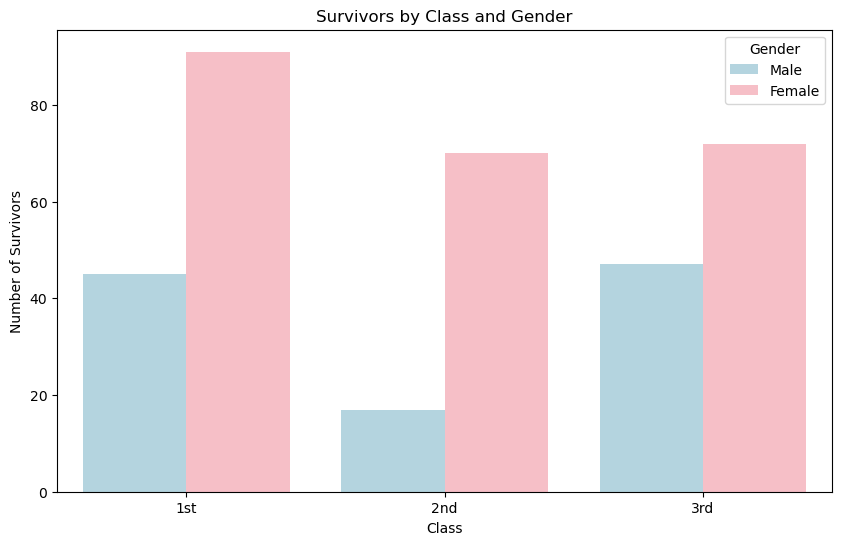

In [28]:
survivor_counts = {
    'Class': ['1st', '1st', '2nd', '2nd', '3rd', '3rd'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Survivors': [
        len(first_class_males), len(first_class_females),
        len(second_class_males), len(second_class_females),
        len(third_class_males), len(third_class_females)
    ]
}

# Convert to DataFrame
survivor_df = pd.DataFrame(survivor_counts)

# Colors
colors = [ 'lightblue', 'lightpink']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=survivor_df, x='Class', y='Survivors', hue='Gender', palette = colors )
plt.title('Survivors by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.show()

As shown in this graph, females were probably prioritized over males in survival, with higher survival rates across all classes. Additionally, the 1st class had a higher proportion of females compared to the 2nd and 3rd classes. This higher proportion of females may have contributed to the greater number of survivors in that class.

### **1.2.5 Age Group Analysis**

Normally, the `Age` variable is not expected to contain decimals, though in this dataset, instances of decimal `Age` values are present. For this reason, decimal values will be rounded to the nearest integer. For example, a value of 0.83 will round up to 1, while a value of 28.5 will round down to 28. In real-world scenarios, age cannot be 0, so ages less than or equal to 0.5 will be rounded up to 1.

In [32]:
train_df['Age'].dtype

dtype('float64')

In [33]:
# Display only the rows where 'Age' has decimal values and are not NaN
decimal_ages = train_df[(train_df['Age'] % 1 != 0) & (train_df['Age'].notna())]
print(decimal_ages['Age'])

57     28.50
78      0.83
111    14.50
116    70.50
122    32.50
123    32.50
148    36.50
152    55.50
153    40.50
203    45.50
227    20.50
296    23.50
305     0.92
331    45.50
469     0.75
525    40.50
644     0.75
676    24.50
735    28.50
755     0.67
767    30.50
803     0.42
814    30.50
831     0.83
843    34.50
Name: Age, dtype: float64


In [34]:
# Display only the rows where 'Age' has decimal values and are not NaN
train_decimal_ages = train_df[(train_df['Age'] % 1 != 0) & (train_df['Age'].notna())]

# Round the decimal ages, and set values <= 0.5 to 1 since Age = 0 is not possible in real word scenarios
train_df.loc[train_decimal_ages.index, 'Age'] = train_decimal_ages['Age'].apply(lambda x: 1 if x <= 0.5 else round(x))

# Print the updated DataFrame
print(train_df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


To better understand and compare survival rates across different age groups, a `GroupByAge` column is added to the dataset. Passengers are categorized into the following age groups:

**Age Groups for Survivors:**
- **Child**: 0 - 11 years
- **Teenager**: 12 - 17 years
- **Young Adult**: 18 - 34 years
- **Adult**: 35 - 59 years
- **Senior**: 60 years and older

In [36]:
# Define bins and labels
bins = [0, 12, 18, 35, 60, float('inf')]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create the 'GroupByAge' column
train_df['GroupByAge'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the first few rows to verify
train_df[['Age', 'GroupByAge']].head()

,Age,GroupByAge
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult


In [37]:
survivor_counts_age = {
    'Class': ['1st', '1st', '1st', '1st', '1st', '1st', '1st', '1st', '1st', '1st',
              '2nd', '2nd', '2nd', '2nd', '2nd', '2nd', '2nd', '2nd', '2nd', '2nd',
              '3rd', '3rd', '3rd', '3rd', '3rd', '3rd', '3rd', '3rd', '3rd', '3rd'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female','Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'AgeGroup': ['Child', 'Child', 'Teenager', 'Teenager', 'Young Adult', 'Young Adult', 'Adult', 'Adult', 'Senior', 'Senior',
                 'Child', 'Child', 'Teenager', 'Teenager', 'Young Adult', 'Young Adult', 'Adult', 'Adult', 'Senior', 'Senior',
                 'Child', 'Child', 'Teenager', 'Teenager', 'Young Adult', 'Young Adult', 'Adult', 'Adult', 'Senior', 'Senior'],
    'Survivors': [
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 1) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)]),

        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 2) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)]),

        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Child') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Teenager') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Young Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Adult') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'male') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)]),
        len(train_df[(train_df['Pclass'] == 3) & (train_df['Sex'] == 'female') & (train_df['GroupByAge'] == 'Senior') & (train_df['Survived'] == 1)])
    ]
}

# Convert to DataFrame
survivor_df_age = pd.DataFrame(survivor_counts_age)

In [38]:
# Pivot table
survivor_df_age_pivot = survivor_df_age.pivot_table(index=['Class', 'AgeGroup'], columns='Gender', values='Survivors', aggfunc='sum').reset_index()

# Remove the 'Gender' label from the columns
survivor_df_age_pivot.columns.name = None

# Print the pivot table without the 'Gender' label
print(survivor_df_age_pivot)

   Class     AgeGroup  Female  Male
0    1st        Adult      40    22
1    1st        Child       0     3
2    1st       Senior       3     2
3    1st     Teenager       7     1
4    1st  Young Adult      32    12
5    2nd        Adult      18     1
6    2nd        Child       8     9
7    2nd       Senior       0     1
8    2nd     Teenager       4     0
9    2nd  Young Adult      38     4
10   3rd        Adult       3     3
11   3rd        Child      11     8
12   3rd       Senior       1     0
13   3rd     Teenager       8     2
14   3rd  Young Adult      24    25


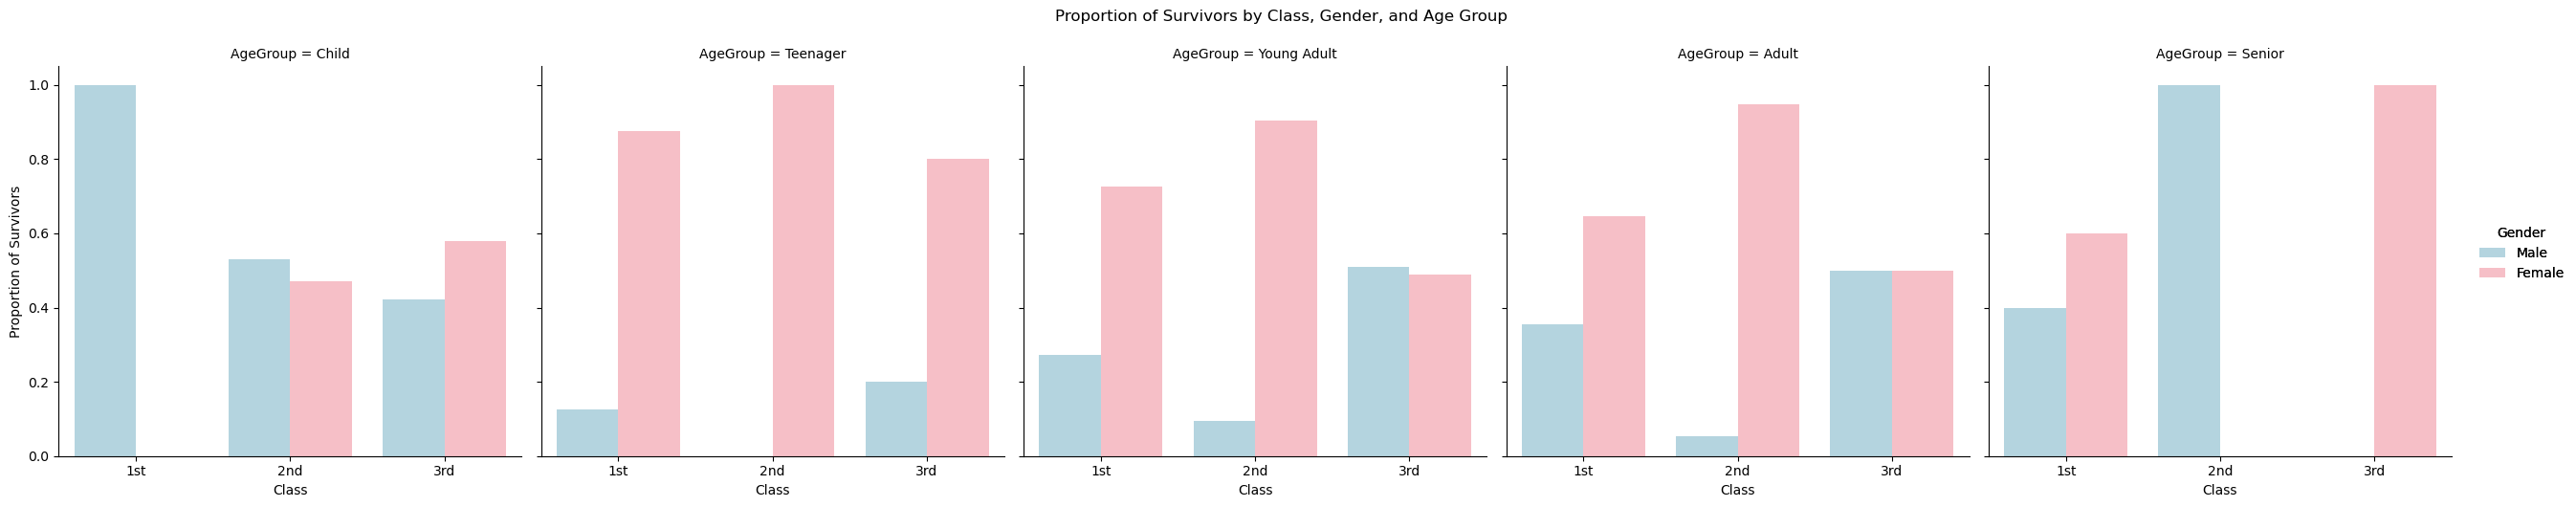

In [39]:
# Total survivors per Class and AgeGroup (Ignoring gender)
total_survivors_per_group = survivor_df_age.groupby(['Class', 'AgeGroup'])['Survivors'].sum().reset_index()

# Merge with the survivor_df_age to get total survivors for each group
merged_df_age = pd.merge(survivor_df_age, total_survivors_per_group, on=['Class', 'AgeGroup'], suffixes=('', '_Total'))

# Proportion of survivors for each gender within each class and age group
merged_df_age['Proportion'] = merged_df_age['Survivors'] / merged_df_age['Survivors_Total']

# Colors for the genders
colors = ['lightblue', 'lightpink']

# Plotting the proportions with separate plots for each age group, showing gender distribution
g = sns.catplot(data=merged_df_age, x='Class', y='Proportion', hue='Gender', col='AgeGroup',
                kind='bar', palette=colors, height=5, aspect=1)

g.fig.suptitle('Proportion of Survivors by Class, Gender, and Age Group', y=1.05)
g.set_axis_labels('Class', 'Proportion of Survivors')
g.add_legend(title='Gender')
plt.show()

In [40]:
# Total passengers per group
total_counts = train_df.groupby(['Pclass', 'Sex', 'GroupByAge'], observed=True).size().reset_index(name='TotalPassengers')

# Number of survivors per group
survivor_counts = train_df[train_df['Survived'] == 1].groupby(['Pclass', 'Sex', 'GroupByAge'], observed=True).size().reset_index(name='Survivors')

# Merge the total counts and survivor counts
merged_df = pd.merge(total_counts, survivor_counts, on=['Pclass', 'Sex', 'GroupByAge'], how='left')

# Fill NaN values (where there were no survivors) with 0
merged_df['Survivors'] = merged_df['Survivors'].fillna(0)

# Calculate the survival rates and display it
merged_df['SurvivalRate'] = merged_df['Survivors'] / merged_df['TotalPassengers']
print(merged_df)

    Pclass     Sex   GroupByAge  TotalPassengers  Survivors  SurvivalRate
0        1  female        Child                1        0.0      0.000000
1        1  female     Teenager                7        7.0      1.000000
2        1  female  Young Adult               33       32.0      0.969697
3        1  female        Adult               41       40.0      0.975610
4        1  female       Senior                3        3.0      1.000000
5        1    male        Child                3        3.0      1.000000
6        1    male     Teenager                1        1.0      1.000000
7        1    male  Young Adult               28       12.0      0.428571
8        1    male        Adult               55       22.0      0.400000
9        1    male       Senior               14        2.0      0.142857
10       2  female        Child                8        8.0      1.000000
11       2  female     Teenager                4        4.0      1.000000
12       2  female  Young Adult       

In [41]:
# Total passengers per group (ignoring gender)
total_counts = train_df.groupby(['Pclass', 'GroupByAge'], observed=True).size().reset_index(name='TotalPassengers')

# Number of survivors per group (ignoring gender)
survivor_counts = train_df[train_df['Survived'] == 1].groupby(['Pclass', 'GroupByAge'], observed=True).size().reset_index(name='Survivors')

# Merge the total counts and survivor counts
merged_df = pd.merge(total_counts, survivor_counts, on=['Pclass', 'GroupByAge'], how='left')

# Fill NaN values (where there were no survivors) with 0
merged_df['Survivors'] = merged_df['Survivors'].fillna(0)

# Calculate the survival rates and display
merged_df['SurvivalRate'] = merged_df['Survivors'] / merged_df['TotalPassengers']
print(merged_df)

    Pclass   GroupByAge  TotalPassengers  Survivors  SurvivalRate
0        1        Child                4          3      0.750000
1        1     Teenager                8          8      1.000000
2        1  Young Adult               61         44      0.721311
3        1        Adult               96         62      0.645833
4        1       Senior               17          5      0.294118
5        2        Child               17         17      1.000000
6        2     Teenager                6          4      0.666667
7        2  Young Adult               97         42      0.432990
8        2        Adult               49         19      0.387755
9        2       Senior                4          1      0.250000
10       3        Child               47         19      0.404255
11       3     Teenager               31         10      0.322581
12       3  Young Adult              208         49      0.235577
13       3        Adult               64          6      0.093750
14       3

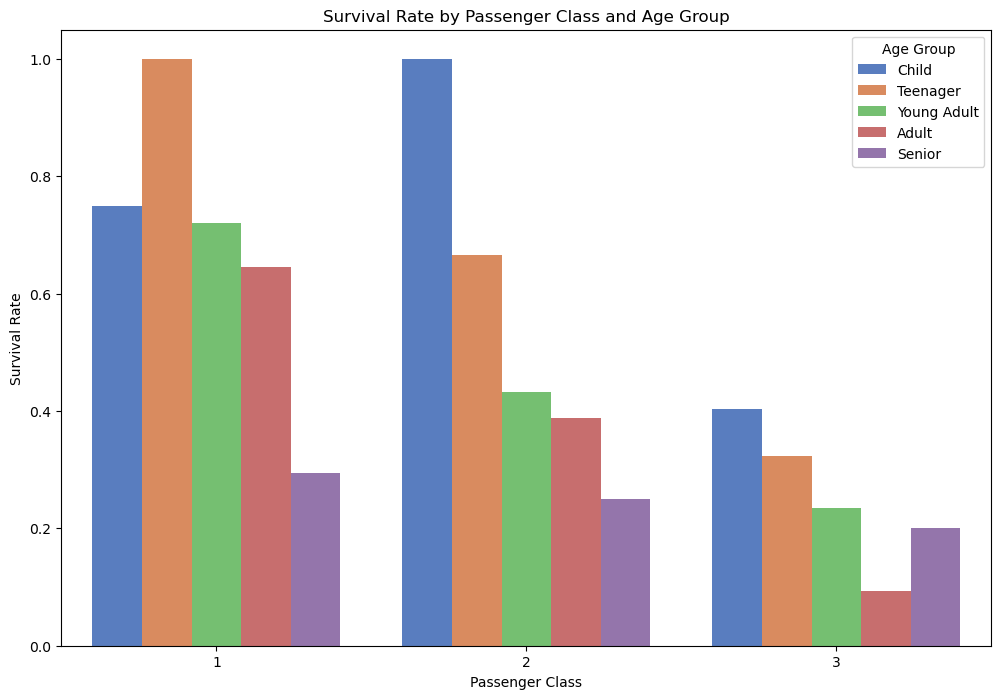

In [42]:
import warnings

# FutureWarning related to observed=False in Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

plt.figure(figsize=(12, 8))
# Create a bar plot with `Pclass` and `GroupByAge` on the x-axis and `SurvivalRate` on the y-axis
sns.barplot(x='Pclass', y='SurvivalRate', hue='GroupByAge', data=merged_df, palette='muted')
plt.title('Survival Rate by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Age Group', loc='upper right')
plt.show()

    GroupByAge  SurvivalRate
0        Child      0.718085
1     Teenager      0.663082
2  Young Adult      0.463293
3        Adult      0.375779
4       Senior      0.248039




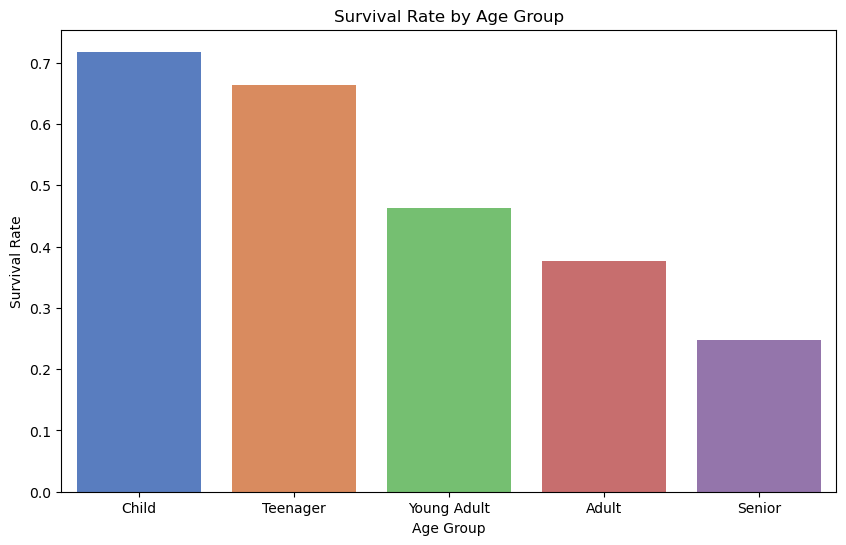

In [43]:
# Survival rate by age group
survival_rate_by_age_group = merged_df.groupby('GroupByAge', observed=True)['SurvivalRate'].mean().reset_index()

print(survival_rate_by_age_group)
print('\n')

# Plot the survival rates by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='GroupByAge', y='SurvivalRate', hue='GroupByAge', data=survival_rate_by_age_group, palette='muted', legend=False)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

## **1.3 Summary**

- The dataset includes 577 males and 312 females. Despite the larger number of males, females were more likely to survive, suggesting that women were given priority during the evacuation process.

- Passengers who were accompanied by others had a higher survival rate than those who were alone. This suggests that social connections or companionship may have been crucial in improving survival chances during the evacuation. Being with others likely provided emotional support and enhanced decision-making in such a critical situation.

- Younger age groups, particularly children and teenagers, had higher survival rates. First class offered the best survival chances for most age groups, with children having the best survival rate in second and third class. Adults aged 35 and older had lower survival rates, indicating that the older the passenger, the lower the chances of survival.

- It's important to note that there are 177 passengers with missing age information, and this dataset represents only a portion of the ship's passengers, so the full dataset might yield slightly different insights.

# **PART 2 - Machine Learning**

---



In this part, two different approaches are explored and compared based on model performance:

- **1. Removing Missing Data**: This method involves deleting rows with missing values to clean the dataset. While it ensures that the remaining data is complete, it reduces the number of observations available for analysis.

- **2. Filling Missing Data**: This approach fills in missing values in an effort to retain more data and potentially enhance the model's performance.

In [47]:
import random
random.seed(42)
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder

## **2.1 First Approach - Remove rows with missing values and then apply the algorithms**

### **2.1.1 Cleaning the Training Dataset**

In [50]:
# Check for missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsAlone          0
GroupByAge     177
dtype: int64


The 2 rows that do not contain `Embarked` information can be deleted. This approach allows the quality of the dataset to be maintained without affecting the overall analysis, as these rows represent a very small portion of the data.

In [52]:
train_ml_df = train_df.copy()

In [53]:
# Check how many rows have both 'Age' and 'Cabin' are missing and count them
missing_age_and_cabin = train_ml_df[train_ml_df['Age'].isnull() & train_ml_df['Cabin'].isnull()]

len(missing_age_and_cabin)

158

158 out of 177 rows that missing `Age` values are also missing `Cabin` values.

In [55]:
train_ml_df = train_ml_df.drop(columns=['PassengerId','Name','Ticket','Cabin','GroupByAge'])

In [56]:
train_ml_df = train_ml_df.dropna(subset=['Age','Embarked'])

In [57]:
print(train_ml_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64


In [58]:
print(len(train_ml_df['Sex']))
print(train_ml_df['Sex'].unique())

712
['male' 'female']


In [59]:
train_ml_df['IsAlone'] = (train_ml_df['Parch'] + train_ml_df['SibSp'] == 0).astype(int)

In [60]:
# Encode Sex and Embarked
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()
train_ml_df['Sex'] = sex_encoder.fit_transform(train_ml_df['Sex'])
train_ml_df['Embarked'] = embarked_encoder.fit_transform(train_ml_df['Embarked'])

### **2.1.2 Correlation matrix**

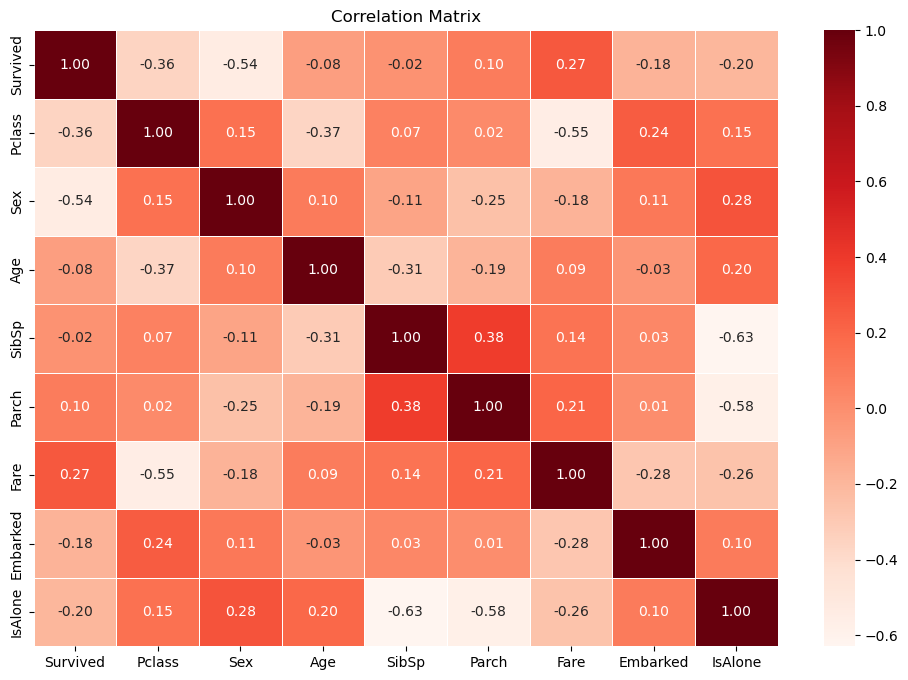

In [62]:
correlation_matrix = train_ml_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Since there is an interest in how each feature correlates with the target variable (in this case, `Survived`), that column can be extracted from the correlation matrix.


In [64]:
target_correlation = correlation_matrix["Survived"].sort_values(ascending=False)
print(target_correlation)

Survived    1.000000
Fare        0.266100
Parch       0.095265
SibSp      -0.015523
Age        -0.081957
Embarked   -0.181979
IsAlone    -0.199741
Pclass     -0.356462
Sex        -0.536762
Name: Survived, dtype: float64


From the exploratory data analysis (EDA), it was observed that class, gender, age, and whether a passenger was traveling alone significantly affected survival outcomes.

The correlation matrix shows that the variables most correlated with survival are `Sex`, with a strong negative correlation (-0.53), followed by `Pclass` with a moderate negative correlation (-0.35), and `IsAlone` with a weaker negative correlation (-0.19).

In [66]:
# Correlation between Fare and Class
fare_pclass_correlation = correlation_matrix.loc['Fare', 'Pclass']
print(f"Correlation between Fare and Class: {fare_pclass_correlation:.2f}")

Correlation between Fare and Class: -0.55


Regarding `Fare`, the correlation of -0.55 between fare and class indicates that as passenger class increases (from 1st to 3rd class), the fare decreases, confirming that higher fares were paid by higher-class passengers.



### **2.1.3 Cleaning the Test Dataset**

In [69]:
test_ml_df = test_df.copy()

In [70]:
test_df['Age'].dtype

dtype('float64')

The test set also needs to be converted from float to integer, so the same process is being applied.

In [72]:
# Display only the rows where 'Age' has decimal values and are not NaN
test_decimal_ages = test_df[(test_df['Age'] % 1 != 0) & (test_df['Age'].notna())]

# Round the decimal ages, and set values <= 0.5 to 1 since Age = 0 is not possible in real word scenarios
test_df.loc[test_decimal_ages.index, 'Age'] = test_decimal_ages['Age'].apply(lambda x: 1 if x <= 0.5 else round(x))

# Print the updated DataFrame
print(test_df['Age'])

0      34.0
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.0
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


In [73]:
test_ml_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The test set has 86 missing values that should also be removed. Additionally, the corresponding rows in the `gender_submission.csv` file must be also removed since it contains the survival results for each `PassengerId`.

In [75]:
# Store the PassengerIds before dropping rows
initial_passenger_ids = test_ml_df['PassengerId']

# Drop rows with missing Age or Fare
test_ml_df = test_ml_df.dropna(subset=['Age', 'Fare'])

# Identify the PassengerIds that were dropped
dropped_passenger_ids = initial_passenger_ids[~initial_passenger_ids.isin(test_ml_df['PassengerId'])]

# Dropping unnecessary columns
test_ml_df = test_ml_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [76]:
# Create the 'IsAlone' column to align with the train_ml_df
test_ml_df['IsAlone'] = (test_ml_df['Parch'] + test_ml_df['SibSp'] == 0).astype(int)

In [77]:
# Transform the test set using the trained encoders
test_ml_df['Sex'] = sex_encoder.transform(test_ml_df['Sex'])  # Assuming no prior fit on training data
test_ml_df['Embarked'] = embarked_encoder.transform(test_ml_df['Embarked'])  # Assuming no prior fit on training data

X_test = test_ml_df

In [78]:
# Display the data types and non-null counts of each column in the test dataframe
test_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    int32  
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    int32  
 7   IsAlone   331 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 19.4 KB


### **2.1.4 Model Development Using the Dataset from the First Approach**



In [80]:
# Since Survived is the target variable
X_train = train_ml_df.drop(columns=['Survived'])
y_train = train_ml_df['Survived']

### **2.1.4.1 Random Forest Classifier**

Since there is no separate test dataset to evaluate the model, cross-validation will be used. Specifically, 10 folds will be applied to provide a more reliable estimate of model performance by ensuring it is tested on diverse subsets of data. Additionally, because this is a classification task, **Stratified Folds** will be used to maintain the same class distribution across all folds, preventing biased results.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score

# Initialize the classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=1)

# Train the model
rf_classifier.fit(X_train, y_train)

# Set up StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [84]:
# Perform 10-fold cross-validation
first_cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("1st Approach - Tunned RandomForest Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {first_cv_scores_rf}")
print(f"Standard Deviation of Cross-validation scores: {first_cv_scores_rf.std():.4f}")
print(f"Mean Cross-validation score: {first_cv_scores_rf.mean():.4f}")

1st Approach - Tunned RandomForest Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.80555556 0.83333333 0.73239437 0.73239437 0.78873239 0.8028169
 0.84507042 0.78873239 0.81690141 0.85915493]
Standard Deviation of Cross-validation scores: 0.0404
Mean Cross-validation score: 0.8005


#### **Hyperparameter Tuning for RandomForest Classifier Using GridSearchCV on the First Approach**

In [86]:
from sklearn.model_selection import GridSearchCV

# Define the grid parameters for hyperparameter tuning
first_rf_params = {
    'n_estimators': [200],
    'max_depth': [6],
    'min_samples_split': [8],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Set up GridSearchCV with the parameter grid
first_rf_gridsearch = GridSearchCV(estimator=rf_classifier, param_grid=first_rf_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')


# Fit the model on training data using GridSearchCV
first_rf_gridsearch.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
first_rf_best_params = first_rf_gridsearch.best_params_
print(f"Best Random Forest Parameters: {first_rf_best_params}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}


In [87]:
# Initiliaze the tunned RandomForest classifier with the best paramaters
best_rf_classifier = RandomForestClassifier(**first_rf_best_params, random_state=42, n_jobs=1)

first_cv_scores_best_rf = cross_val_score(best_rf_classifier, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("1st Approach - Tunned RandomForest Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {first_cv_scores_best_rf}")
print(f"Standard Deviation of Cross-validation scores: {first_cv_scores_best_rf.std():.4f}")
print(f"Mean Cross-validation score: {first_cv_scores_best_rf.mean():.4f}")

1st Approach - Tunned RandomForest Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.81944444 0.83333333 0.78873239 0.8028169  0.78873239 0.77464789
 0.88732394 0.77464789 0.85915493 0.87323944]
Standard Deviation of Cross-validation scores: 0.0393
Mean Cross-validation score: 0.8202


In [88]:
print(f"Random Forest Accuracy with Default Parameters using the First Approach: {first_cv_scores_rf.mean():.4f}")
print(f"Random Forest Accuracy after Hyperparameter Tuning on the First Approach: {first_cv_scores_best_rf.mean():.4f}")
print(f"Accuracy Improvement: {first_cv_scores_best_rf.mean() - first_cv_scores_rf.mean():.4f}")

Random Forest Accuracy with Default Parameters using the First Approach: 0.8005
Random Forest Accuracy after Hyperparameter Tuning on the First Approach: 0.8202
Accuracy Improvement: 0.0197


After tuning several parameters with GridSearch, the cross-validation accuracy of the Random Forest improved by **1.97%**, increasing from **80.05%** to **82.02%**.

### **2.1.4.2 Extreme Gradient Boosting Classifier**

In [91]:
# pip install xgboost

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier

In [93]:
# Initialize the XGBoost classifier using the default parameters
xgb_classifier = XGBClassifier(random_state=42, n_jobs=1)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=1,
              num_parallel_tree=None, random_state=42, ...)

In [94]:
# Perform 10-fold cross-validation
first_cv_scores_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("1st Approach - XGBClassifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {first_cv_scores_xgb}")
print(f"Standard Deviation of Cross-validation scores: {first_cv_scores_xgb.std():.4f}")
print(f"Mean Cross-validation score: {first_cv_scores_xgb.mean():.4f}")

1st Approach - XGBClassifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.81944444 0.83333333 0.8028169  0.76056338 0.77464789 0.76056338
 0.87323944 0.78873239 0.83098592 0.83098592]
Standard Deviation of Cross-validation scores: 0.0348
Mean Cross-validation score: 0.8075


#### **Hyperparameter Tuning for Extreme Gradient Boosting Classifier Using GridSearchCV on the First Approach**

In [96]:
# Define the grid parameter
first_xgb_params = {
    'max_depth': [4],
    'learning_rate': [0.1],
    'n_estimators': [150],
    'subsample': [0.8],
    'colsample_bytree': [0.7],
    'gamma': [0.2],
    'min_child_weight': [3]
}

# Set up GridSearchCV with the parameter grid
first_xgb_gridsearch = GridSearchCV(estimator=xgb_classifier, param_grid=first_xgb_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model on training data using GridSearchCV
first_xgb_gridsearch.fit(X_train, y_train)

# Best parameters found by GridSearch
first_xgb_best_params = first_xgb_gridsearch.best_params_
print(f"Best parameters: {first_xgb_best_params}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.8}


In [97]:
# Initialize the classifier with the best parameters
best_xgb_classifier = XGBClassifier(**first_xgb_best_params, random_state=42, n_jobs=1)

# Fit the model on training data
best_xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=1,
              num_parallel_tree=None, random_state=42, ...)

In [98]:
# Perform 10-fold cross-validation
first_cv_scores_best_xgb = cross_val_score(best_xgb_classifier, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("1st Approach - Tunned XGBClassifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {first_cv_scores_best_xgb}")
print(f"Standard Deviation of Cross-validation scores: {first_cv_scores_best_xgb.std():.4f}")
print(f"Mean Cross-validation score: {first_cv_scores_best_xgb.mean():.4f}")

1st Approach - Tunned XGBClassifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.79166667 0.83333333 0.84507042 0.83098592 0.77464789 0.8028169
 0.85915493 0.81690141 0.83098592 0.87323944]
Standard Deviation of Cross-validation scores: 0.0287
Mean Cross-validation score: 0.8259


## **2.2 Second Approach - Filling missing values before applying the algorithm**

The data shows that titles like 'Master' are mostly associated with the `Child` group, while titles like 'Mrs.' are typically linked to the `Adult` group. Since predicting an age range (such as 20-50 years) is generally easier and more accurate than predicting an exact age, titles can be helpful for filling in missing `GroupByAge` values and providing the algorithm with valuable context.

In this approach, missing `Age` values, which are also missing the `GroupByAge` values, are filled based on the `Title` associated with each person’s `Name` (e.g., Mr., Mrs., Miss). For each unique `Title`, the age group with the highest proportion of individuals is identified. This identified age group is then used to fill in the missing `GroupByAge` values. Later, each age group distribution will be used to fill the missing `Age` values with either the group’s mean or median.

### **2.2.1 Filling Missing `GroupByAge` and `Age` Values in the Training Dataset Based on `Title` Proportions**

In [102]:
train_ml2_df = train_df.copy()

In [103]:
# Adding IsAlone column
train_ml2_df['IsAlone'] = (train_ml2_df['Parch'] + train_ml2_df['SibSp'] == 0).astype(int)

In [104]:
# Extract title from the Name column
train_ml2_df['Title'] = train_ml2_df['Name'].str.extract('([A-Za-z]+)\\.', expand=False).str.strip().str.capitalize()

# Display the different titles to verify
title_counts = train_ml2_df['Title'].value_counts()
print("Title Counts:\n", title_counts)

Title Counts:
 Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [105]:
# Group the data by 'Title' and then get value counts of 'GroupByAge' for each title, normalized to get proportions
age_group_proportions = train_ml2_df.groupby('Title')['GroupByAge'].value_counts(normalize=True).unstack(fill_value=0)

# Convert the frequency counts to percentages for better readability and print the results
age_group_proportions *= 100
print("\nAge Group Proportions by Title (%):\n", age_group_proportions)


Age Group Proportions by Title (%):
 GroupByAge      Child   Teenager  Young Adult       Adult      Senior
Title                                                                
Capt         0.000000   0.000000     0.000000    0.000000  100.000000
Col          0.000000   0.000000     0.000000   50.000000   50.000000
Countess     0.000000   0.000000   100.000000    0.000000    0.000000
Don          0.000000   0.000000     0.000000  100.000000    0.000000
Dr           0.000000   0.000000    33.333333   66.666667    0.000000
Jonkheer     0.000000   0.000000     0.000000  100.000000    0.000000
Lady         0.000000   0.000000     0.000000  100.000000    0.000000
Major        0.000000   0.000000     0.000000  100.000000    0.000000
Master      97.222222   2.777778     0.000000    0.000000    0.000000
Miss        21.917808  13.013699    49.315068   15.068493    0.684932
Mlle         0.000000   0.000000   100.000000    0.000000    0.000000
Mme          0.000000   0.000000   100.000000    0.0

In [106]:
# Create a dictionary which represents the proportion of individuals in each age group (Child, Teenager, Young Adult, Adult, Senior)
# for each unique title (e.g., 'Mr', 'Mrs', 'Master', etc.). This will be used to fill missing 'GroupByAge' values
# based on the most common age group for each title.

age_group_proportions = {
    'Capt': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 0.0, 'Senior': 100.0},
    'Col': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 50.0, 'Senior': 50.0},
    'Countess': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 100.0, 'Adult': 0.0, 'Senior': 0.0},
    'Don': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 100.0, 'Senior': 0.0},
    'Dr': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 33.333333, 'Adult': 66.666667, 'Senior': 0.0},
    'Jonkheer': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 100.0, 'Senior': 0.0},
    'Lady': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 100.0, 'Senior': 0.0},
    'Major': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 100.0, 'Senior': 0.0},
    'Master': {'Child': 97.222222, 'Teenager': 2.777778, 'Young Adult': 0.0, 'Adult': 0.0, 'Senior': 0.0},
    'Miss': {'Child': 21.917808, 'Teenager': 13.013699, 'Young Adult': 49.315068, 'Adult': 15.068493, 'Senior': 0.684932},
    'Mlle': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 100.0, 'Adult': 0.0, 'Senior': 0.0},
    'Mme': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 100.0, 'Adult': 0.0, 'Senior': 0.0},
    'Mr': {'Child': 0.251256, 'Teenager': 5.276382, 'Young Adult': 59.547739, 'Adult': 29.899497, 'Senior': 5.025126},
    'Mrs': {'Child': 0.0, 'Teenager': 3.703704, 'Young Adult': 44.444444, 'Adult': 49.074074, 'Senior': 2.777778},
    'Ms': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 100.0, 'Adult': 0.0, 'Senior': 0.0},
    'Rev': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 33.333333, 'Adult': 66.666667, 'Senior': 0.0},
    'Sir': {'Child': 0.0, 'Teenager': 0.0, 'Young Adult': 0.0, 'Adult': 100.0, 'Senior': 0.0}
}

In [107]:
def fill_group_by_age(row):
    # Check if the GroupByAge value is missing for the row
    if pd.isna(row['GroupByAge']):
        title = row['Title']
        # Check if the title exists in the age_group_proportions dictionary
        if title in age_group_proportions:
            age_groups = age_group_proportions[title]
            total_prob = sum(age_groups.values())
            if total_prob == 0:
                # Handle case when all probabilities for the title are zero
                return 'No valid probabilities'
            # Find the age group with the highest proportion for this title
            highest_prob_age_group = max(age_groups, key=age_groups.get)
            return highest_prob_age_group
        else:
            # If the title is not found in the dictionary, return Unknown
            return 'Unknown'
    else:
        # If GroupByAge is already filled, return the existing value
        return row['GroupByAge']

# Apply the function to fill missing GroupByAge values in the dataset
train_ml2_df['GroupByAge'] = train_ml2_df.apply(fill_group_by_age, axis=1)

Now that the `GroupByAge` values have been filled, the imputation of missing `Age` values based on the age group distribution can be performed.

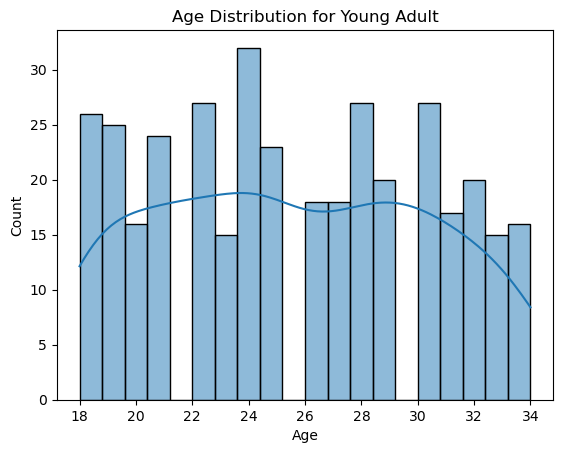

Young Adult - Skewness: 0.06476400316553631


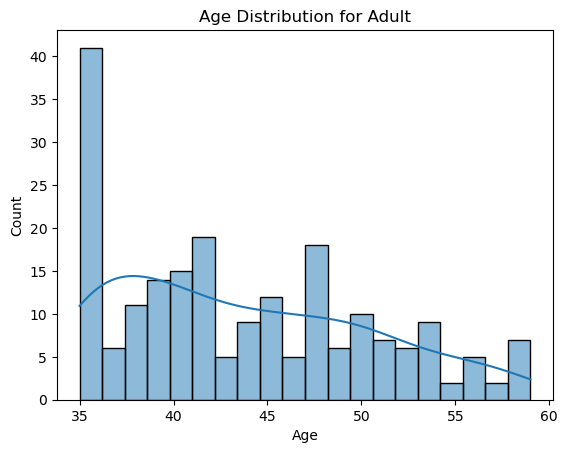

Adult - Skewness: 0.483058438008933


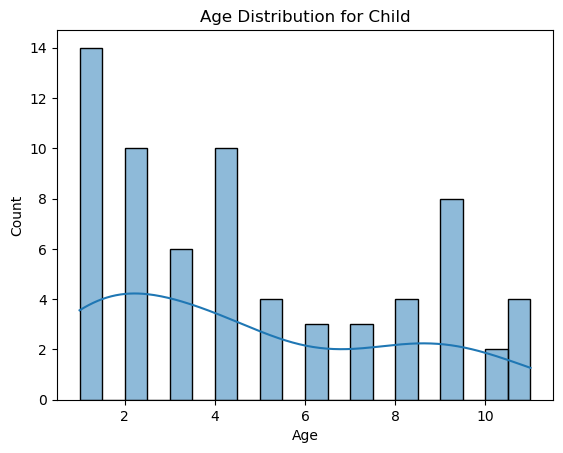

Child - Skewness: 0.5185293637533549


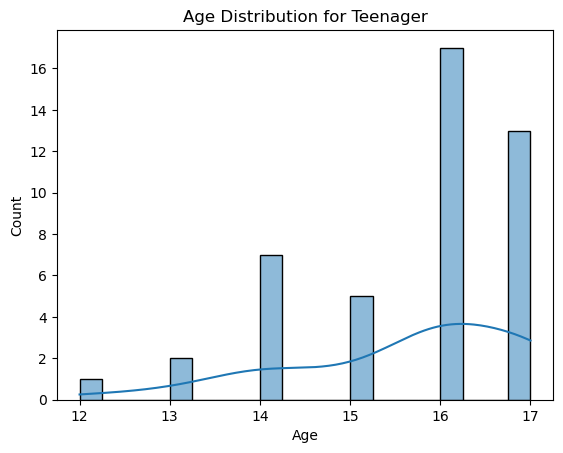

Teenager - Skewness: -0.8870969090947519


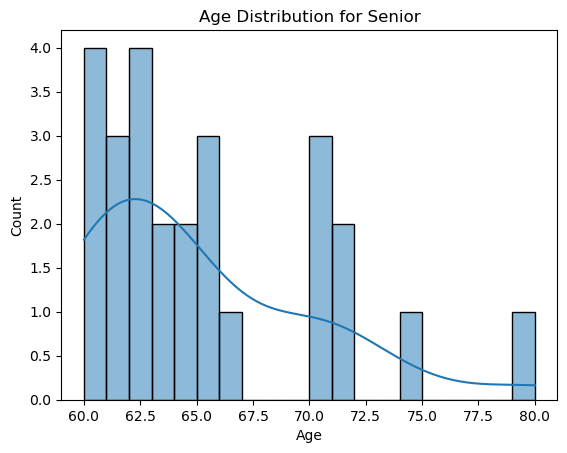

Senior - Skewness: 1.2197453706609107
             median       mean  skewness
GroupByAge                              
Adult          42.0  43.693780  0.483058
Child           4.0   4.691176  0.518529
Senior         63.5  65.076923  1.219745
Teenager       16.0  15.644444 -0.887097
Young Adult    25.0  25.560109  0.064764


In [109]:
from scipy.stats import skew

# Calculate median and mean for each GroupByAge
group_age_statistics = train_ml2_df.groupby('GroupByAge')['Age'].agg(['median', 'mean'])

# Calculate skewness for each GroupByAge
group_age_skewness = train_ml2_df.groupby('GroupByAge')['Age'].apply(lambda x: skew(x.dropna()))

# Add skewness as a new column to the existing statistics DataFrame
group_age_statistics['skewness'] = group_age_skewness

# Visualize the distribution of Age for each GroupByAge and print the skewness
for group in train_ml2_df['GroupByAge'].unique():
    sns.histplot(train_ml2_df[train_ml2_df['GroupByAge'] == group]['Age'], kde=True, bins=20)
    plt.title(f"Age Distribution for {group}")
    plt.show()

    group_ages = train_ml2_df[train_ml2_df['GroupByAge'] == group]['Age'].dropna()
    print(f"{group} - Skewness: {skew(group_ages)}")

# Display the DataFrame with median, mean, and skewness
print(group_age_statistics)

Missing `Age` values for the `Adult`, `Child`, `Teenager`, and `Young Adult` groups will be filled using the mean, while the median will be used for the `Senior` group due to its higher skewness. Using the median helps avoid the impact of extreme values in skewed data, making the imputation more reliable.

In [111]:
# Function to fill missing Age values based on GroupByAge
def fill_missing_age(row):
    if pd.isna(row['Age']):
        group = row['GroupByAge']
        if group == 'Senior':
            # Use median for Seniors and round to nearest integer
            return int(round(group_age_statistics.loc[group, 'median']))
        else:
            # Use mean for other groups and round to nearest integer
            return int(round(group_age_statistics.loc[group, 'mean']))
    else:
        # Return the Age rounding to nearest integer
        return int(round(row['Age']))

# Apply the function
train_ml2_df['Age'] = train_ml2_df.apply(fill_missing_age, axis=1)

In [112]:
train_ml2_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsAlone          0
GroupByAge       0
Title            0
dtype: int64

In [113]:
# Check again which titles are resulting in 'Unknown' (for debug purposes)
print("Titles resulting in 'Unknown':", train_ml2_df[train_ml2_df['GroupByAge'] == 'Unknown']['Title'].unique())

Titles resulting in 'Unknown': []


In [114]:
# Function to split Ticket into Ticket_prefix and Ticket_number
def split_ticket(ticket):
    parts = ticket.split()
    if len(parts) > 1:
        # Return the first part as the identifier and the last part as the ticket number
        return parts[0], parts[-1]
    else:
        # If there's only one part, return 'NaN' for the identifier
        return 'NaN', parts[0]

# Apply the split_ticket function to each ticket
train_ml2_df['Ticket_prefix'], train_ml2_df['Ticket_number'] = zip(*train_ml2_df['Ticket'].apply(split_ticket))

# Convert 'Ticket_number' to numeric if needed. If non-numeric, it will be set to NaN
train_ml2_df['Ticket_number'] = pd.to_numeric(train_ml2_df['Ticket_number'], errors='coerce')

In [115]:
train_ml2_df = train_ml2_df.drop(columns=['PassengerId','Name','Cabin','Ticket','Ticket_prefix'])

In [116]:
train_ml2_df = train_ml2_df.dropna(subset=['Embarked'])

In [117]:
train_ml2_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
IsAlone          0
GroupByAge       0
Title            0
Ticket_number    4
dtype: int64

In [118]:
# Fill missing values in the 'Ticket_number' column with 0
# These 4 missing Ticket values might correspond to crew members and are likely the ones that had the 'LINE' label as a placeholder
train_ml2_df['Ticket_number'] = train_ml2_df['Ticket_number'].fillna(0)

In [119]:
print(train_ml2_df['Title'].value_counts())

Title
Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [120]:
# Define the manual encoding for the known titles
title_encoding = {
    'Mr': 0,
    'Miss': 1,
    'Mrs': 2,
    'Master': 3,
    'Col': 4,
    'Rev': 5,
    'Dr': 6,
    'Ms': 7,
    'Mlle': 8,
    'Major': 9,
    'Mme': 10,
    'Don': 11,
    'Lady': 12,
    'Dona': 12, # The titles 'Lady' and 'Dona' each appear only once in the dataset, so they will be encoded similarly.
    'Sir': 13,
    'Capt': 14,
    'Countess': 15,
    'Jonkheer': 16
}

# Apply encoding to the 'Title' column in train_ml2_df
train_ml2_df['Title'] = train_ml2_df['Title'].map(title_encoding)

In [121]:
# Initialize the encoders
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()
groupbyage_encoder = LabelEncoder()

# Transform the train set using the encoders
train_ml2_df['Sex'] = sex_encoder.fit_transform(train_ml2_df['Sex'])
train_ml2_df['Embarked'] = embarked_encoder.fit_transform(train_ml2_df['Embarked'])
train_ml2_df['GroupByAge'] = groupbyage_encoder.fit_transform(train_ml2_df['GroupByAge'])

In [122]:
# Get the correlation matrix
train_correlation_matrix = train_ml2_df.corr()

# Extract the correlation values for the 'Survived' column
train_correlation_to_survived = train_correlation_matrix['Survived'].sort_values(ascending=False)
print(train_correlation_to_survived)

Survived         1.000000
Title            0.289149
Fare             0.255290
Parch            0.083151
SibSp           -0.034040
Age             -0.041653
Ticket_number   -0.094989
GroupByAge      -0.121529
Embarked        -0.169718
IsAlone         -0.206207
Pclass          -0.335549
Sex             -0.541585
Name: Survived, dtype: float64


### **2.2.2 Aligning the Test Dataset with the Train Set**

In [124]:
test_ml2_df = test_df.copy()

In [125]:
# Re-create a new column to align with the train_ml2_df
test_ml2_df['IsAlone'] = (test_ml2_df['Parch'] + test_ml2_df['SibSp'] == 0).astype(int)

In [126]:
# Create the 'GroupByAge' column using pd.cut
test_ml2_df['GroupByAge'] = pd.cut(test_ml2_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the first few rows to verify
test_ml2_df[['Age', 'GroupByAge']].head()

,Age,GroupByAge
0,34.0,Young Adult
1,47.0,Adult
2,62.0,Senior
3,27.0,Young Adult
4,22.0,Young Adult


In [127]:
# Extract title from the Name column
test_ml2_df['Title'] = test_ml2_df['Name'].str.extract('([A-Za-z]+)\\.', expand=False)

# Display the different titles to verify
title_counts = test_ml2_df['Title'].value_counts()
print("Title Counts:\n", title_counts)

Title Counts:
 Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [128]:
# Re-apply the function to fill the GroupByAge missing values
test_ml2_df['GroupByAge'] = test_ml2_df.apply(fill_group_by_age, axis=1)

# Re-apply the function to fill the Age missing values
test_ml2_df['Age'] = test_ml2_df.apply(fill_missing_age, axis=1)

In [129]:
# Apply the split_ticket function to each ticket
test_ml2_df['Ticket_prefix'], test_ml2_df['Ticket_number'] = zip(*test_ml2_df['Ticket'].apply(split_ticket))

# Convert 'Ticket_number' to numeric if needed. If non-numeric, it will be set to NaN
test_ml2_df['Ticket_number'] = pd.to_numeric(test_ml2_df['Ticket_number'], errors='coerce')

test_ml2_df = test_ml2_df.drop(columns=['Name','Cabin','Ticket','Ticket_prefix'])

In [130]:
test_ml2_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         0
IsAlone          0
GroupByAge       0
Title            0
Ticket_number    0
dtype: int64

In [131]:
test_test_df = test_ml2_df.copy()

In [132]:
# Titles not in the encoding will be set to NaN (or -1 for unknown titles)
test_ml2_df['Title'] = test_ml2_df['Title'].map(title_encoding)

In [133]:
# Transform the test set using the trained encoders
test_ml2_df['Sex'] = sex_encoder.transform(test_ml2_df['Sex'])
test_ml2_df['Embarked'] = embarked_encoder.transform(test_ml2_df['Embarked'])
test_ml2_df['GroupByAge'] = groupbyage_encoder.transform(test_ml2_df['GroupByAge'])

Let's identify which features are strongly correlated with `Fare` based on the previous correlation matrix.

In [135]:
# Calculate the correlation matrix
correlation_matrix = train_ml2_df.corr()

fare_correlation = correlation_matrix['Fare'].sort_values(ascending=True)
print(fare_correlation)

Pclass          -0.548193
IsAlone         -0.274079
Embarked        -0.226311
GroupByAge      -0.186700
Sex             -0.179958
Ticket_number   -0.154941
Age              0.106053
Title            0.106490
SibSp            0.160887
Parch            0.217532
Survived         0.255290
Fare             1.000000
Name: Fare, dtype: float64


It was already known that `Fare` is highly correlated with `Pclass`, but now the three most negatively correlated features will be selected to identify passengers with matching values from the train and test set.

In [137]:
# Identify passengers with missing Fare
missing_fare_info = test_ml2_df[test_ml2_df['Fare'].isna()][['PassengerId', 'Pclass', 'Embarked', 'IsAlone']]

# PassengerIds and GroupByAge with missing Fare
print(missing_fare_info)

     PassengerId  Pclass  Embarked  IsAlone
152         1044       3         2        1


In [138]:
# Find the number of passengers in both the train and test sets who have the same values
# for Pclass, Embarked, and IsAlone as the passengers with missing Fare
train_fare_corr_count = train_ml2_df[
    (train_ml2_df['Pclass'] == 3) &
    (train_ml2_df['Embarked'] == 2) &
    (train_ml2_df['IsAlone'] == 1)
].shape[0]
test_fare_corr_count = test_ml2_df[
    (test_ml2_df['Pclass'] == 3) &
    (test_ml2_df['Embarked'] == 2) &
    (test_ml2_df['IsAlone'] == 1)
].shape[0]

# Print the number of matching passengers for both the train and test sets
print(f"Number of passengers in the Train Set: {train_fare_corr_count}")
print(f"Number of passengers in the Test Set: {test_fare_corr_count}")

Number of passengers in the Train Set: 232
Number of passengers in the Test Set: 92


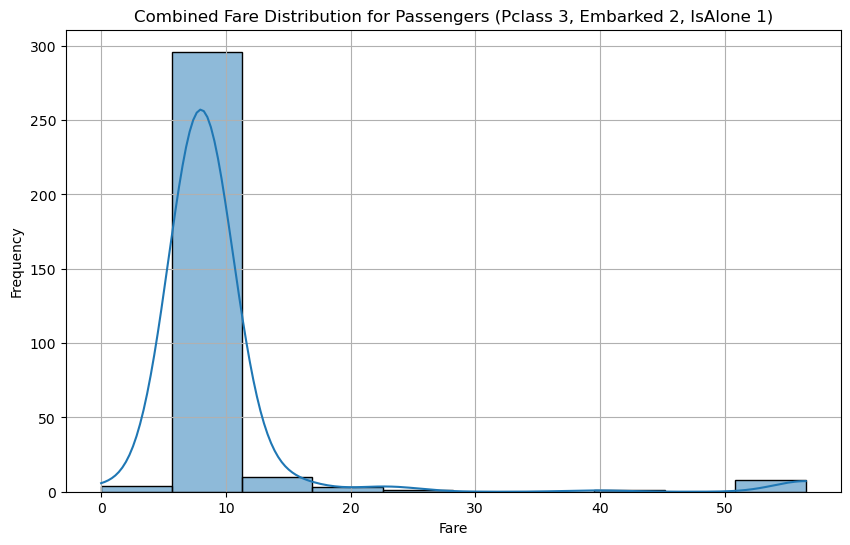

Median Fare: 7.8958
Mean Fare: 9.593713003095974
Mode Fare (Most frequent Fare value): 8.05
Skewness of Fare: 5.201582244887729


In [139]:
# Combine the Fare data for passengers in 3rd class (Pclass == 3), embarked from the 2nd port (Embarked == 2),
# and traveling alone (IsAlone == 1) from both the train and test sets
combined_fare_corr_data = pd.concat([
    train_ml2_df[(train_ml2_df['Pclass'] == 3) & (train_ml2_df['Embarked'] == 2) & (train_ml2_df['IsAlone'] == 1)]['Fare'].dropna(),
    test_ml2_df[(test_ml2_df['Pclass'] == 3) & (test_ml2_df['Embarked'] == 2) & (test_ml2_df['IsAlone'] == 1)]['Fare'].dropna()
])

# Plot the combined Fare distribution with a KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(combined_fare_corr_data, bins=10, kde=True, edgecolor='black')
plt.title('Combined Fare Distribution for Passengers (Pclass 3, Embarked 2, IsAlone 1)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print median, mean, and skewness for the combined Fare data
median_fare_corr = combined_fare_corr_data.median()
mean_fare_corr = combined_fare_corr_data.mean()
mode_fare_corr = combined_fare_corr_data.mode()[0]
skewness_fare_corr = combined_fare_corr_data.skew()

# Print the results
print(f"Median Fare: {median_fare_corr}")
print(f"Mean Fare: {mean_fare_corr}")
print(f"Mode Fare (Most frequent Fare value): {mode_fare_corr}")
print(f"Skewness of Fare: {skewness_fare_corr}")

From the distribution it can be seen that while most passengers paid lower fares, there were a few high fares that significantly affect the mean. Since the combined `Fare` distribution is highly skewed to the right with skewness of 5.20, the missing `Fare` value will be filled with the median (7.8958), as it more accurately reflects the typical value in this case.



In [141]:
# Fill the missing Fare value with the filtered median Fare
test_ml2_df['Fare'] = test_ml2_df['Fare'].fillna(median_fare_corr)

# Verify if the missing Fare values have been filled
print(test_ml2_df[test_ml2_df['PassengerId'].isin(missing_fare_info['PassengerId'])][['PassengerId', 'Fare']])

     PassengerId    Fare
152         1044  7.8958


In [142]:
# Dropping unnecessary columns
test_ml2_df = test_ml2_df.drop(columns=['PassengerId'])

The number of instances after filling missing values, rather than removing them, can now be observed.

In [144]:
# Calculating and comparing the number of instances before and after filling missing values
test_diff = len(test_ml2_df) - len(test_ml_df)
train_diff = len(train_ml2_df) - len(train_ml_df)

# Displaying the results in a more informative way
print(f'Number of instances before filling values in test_ml_df: {len(test_ml_df)}')
print(f'Number of instances after filling values in test_ml2_df: {len(test_ml2_df)}')
print(f'Test dataset increased by: {test_diff} instances\n')

print(f'Number of instances before filling values in train_ml_df: {len(train_ml_df)}')
print(f'Number of instances after filling values in train_ml2_df: {len(train_ml2_df)}')
print(f'Train dataset increased by: {train_diff} instances')

Number of instances before filling values in test_ml_df: 331
Number of instances after filling values in test_ml2_df: 418
Test dataset increased by: 87 instances

Number of instances before filling values in train_ml_df: 712
Number of instances after filling values in train_ml2_df: 889
Train dataset increased by: 177 instances


### **2.2.3 Model Development Using the Dataset from the Second Approach**


In [146]:
# Since 'Survived' is the target variable
X2_train = train_ml2_df.drop(columns=['Survived'])
y2_train = train_ml2_df['Survived']

X2_test = test_ml2_df

#### **2.2.3.1 Logistic Regression**

Let's try applying a simple model to the data from the second approach to see how it will performs on the Titanic dataset.

In [148]:
import warnings
from sklearn.linear_model import LogisticRegression

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning)

lgr = LogisticRegression(random_state=42, n_jobs=1)

# Fit the model on training data using GridSearchCV
lgr.fit(X2_train, y2_train)

# Perform 10-fold cross-validation
second_cv_scores_lgr = cross_val_score(lgr, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Logistic Regression Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_lgr}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_lgr.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_lgr.mean():.4f}")

2nd Approach - Logistic Regression Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.70786517 0.65168539 0.68539326 0.65168539 0.6741573  0.68539326
 0.80898876 0.7752809  0.68539326 0.71590909]
Standard Deviation of Cross-validation scores: 0.0486
Mean Cross-validation score: 0.7042


##### **Hyperparameter Tuning for Logistic Regression Using GridSearchCV on the Second Approach**

In [150]:
# Define the grid parameters for hyperparameter tuning
log_reg_params = {
    'penalty': ['l2'],
    'C': [0.1],
    'solver': ['lbfgs'],
    'max_iter': [300],
    'class_weight': ['balanced'],
    'l1_ratio': [0]
}

# Set up GridSearchCV for Logistic Regression
log_reg_gridsearch = GridSearchCV(estimator=lgr, param_grid=log_reg_params,
                                  cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the Logistic Regression model
log_reg_gridsearch.fit(X2_train, y2_train)

# Best parameters for Logistic Regression
log_reg_best_params = log_reg_gridsearch.best_params_
print(f"Best Logistic Regression parameters: {log_reg_best_params}")

# Initialize the Logistic Regression with best parameters
best_log_reg_classifier = LogisticRegression(**log_reg_best_params, random_state=42, n_jobs=1)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Logistic Regression parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}


In [151]:
# Fit the Logistic Regression model
best_log_reg_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation for Logistic Regression
second_cv_scores_best_lgr = cross_val_score(best_log_reg_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Tunned Logistic Regression Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_best_lgr}")
print(f"Standard Deviation: {second_cv_scores_best_lgr.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_best_lgr.mean():.4f}")

2nd Approach - Tunned Logistic Regression Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.80898876 0.7752809  0.79775281 0.80898876 0.73033708 0.79775281
 0.7752809  0.86516854 0.79775281 0.77272727]
Standard Deviation: 0.0328
Mean Cross-validation score: 0.7930


After tuning, Logistic Regression achieved a **79.3% mean cross-validation accuracy**. This is a decent starting point given the model's simplicity, but it is still below the desired performance target.

#### **2.2.3.2 Random Forest Classifier**


 Now let's move on to testing a complex model, similar to the first approach: the **Random Forest Classifier**. This model is ideal to begin with because it is relatively simple and robust, making it a good baseline to determine if basic ensemble methods are effective on the dataset. **Random Forest Classifier** works by building multiple decision trees in parallel and having each tree make its own prediction. The final prediction is made by combining the results of all the trees, usually through a majority vote.

In [154]:
# Initialize and train the model on the training data
rf2_classifier = RandomForestClassifier(random_state=42, n_jobs=1)
rf2_classifier.fit(X2_train, y2_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [155]:
# Perform 10-fold cross-validation
second_cv_scores_rf = cross_val_score(rf2_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - RandomForest Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_rf}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_rf.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_rf.mean():.4f}")

2nd Approach - RandomForest Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.8988764  0.82022472 0.82022472 0.80898876 0.80898876 0.84269663
 0.83146067 0.8988764  0.79775281 0.86363636]
Standard Deviation of Cross-validation scores: 0.0347
Mean Cross-validation score: 0.8392


##### **Hyperparameter Tuning for RandomForest Classifier Using GridSearchCV on the Second Approach**

In [157]:
# Define the grid parameters for hyperparameter tuning
second_rf_params = {
    'n_estimators': [500],
    'max_depth': [25],
    'min_samples_split': [15],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [False],
    'criterion': ['gini']
}

# Set up GridSearchCV
second_rf_gridsearch = GridSearchCV(estimator=rf2_classifier, param_grid=second_rf_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model on training data using GridSearchCV
second_rf_gridsearch.fit(X2_train, y2_train)

# Get the best parameters found by GridSearchCV
second_rf_best_params = second_rf_gridsearch.best_params_
print(f"Best Random Forest Classifier Parameters: {second_rf_best_params}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Random Forest Classifier Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 500}


In [158]:
# Initialize the model with the best parameters
best_rf2_classifier = RandomForestClassifier(**second_rf_best_params, random_state=42, n_jobs=1)

# Fit the model on training data using the best parameters from grid search
best_rf2_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation
second_cv_scores_best_rf = cross_val_score(best_rf2_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Tunned RandomForest Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_best_rf}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_best_rf.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_best_rf.mean():.4f}")

2nd Approach - Tunned RandomForest Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.91011236 0.85393258 0.82022472 0.86516854 0.79775281 0.80898876
 0.86516854 0.8988764  0.80898876 0.84090909]
Standard Deviation of Cross-validation scores: 0.0367
Mean Cross-validation score: 0.8470


In [159]:
print(f"RandomForest Accuracy after Hyperparameter Tuning on the First Approach: {first_cv_scores_best_rf.mean():.4f}")
print(f"RandomForest Accuracy after Hyperparameter Tuning on the Second Approach:: {second_cv_scores_best_rf.mean():.4f}")
print(f"Accuracy Improvement: {second_cv_scores_best_rf.mean() - first_cv_scores_best_rf.mean():.4f}")

RandomForest Accuracy after Hyperparameter Tuning on the First Approach: 0.8202
RandomForest Accuracy after Hyperparameter Tuning on the Second Approach:: 0.8470
Accuracy Improvement: 0.0268


The Random Forest model, being more complex, performs better on the dataset compared to the simpler Logistic Regression. Additionally, when using the dataset from the second approach, it outperformed the Random Forest from the first approach, showing a **2.68%** improvement.

#### **2.2.3.3 Bagging Classifier**


Next, we can test the **BaggingClassifier**, which also uses multiple decision trees but employs a slightly different technique. It works by creating multiple instances of the same base model (typically decision trees) using unique, randomly sampled subsets of the training data through a process called Bootstrap Aggregating, or Bagging. Each model makes its own prediction, and the final classification is determined by majority voting. Testing Bagging after Random Forest helps assess whether simple bootstrapping is sufficient or if the added randomness in feature selection (as in Random Forest) provides better performance.

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the Bagging Classifier with a Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42, n_jobs=1)

# Fit the model to the training data
bagging_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation for the Bagging Classifier
second_cv_scores_bc = cross_val_score(bagging_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Bagging Classifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_bc}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_bc.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_bc.mean():.4f}")

2nd Approach - Bagging Classifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.88764045 0.85393258 0.83146067 0.82022472 0.7752809  0.78651685
 0.83146067 0.91011236 0.80898876 0.86363636]
Standard Deviation of Cross-validation scores: 0.0405
Mean Cross-validation score: 0.8369


##### **Hyperparameter Tuning for Bagging Classifier Using GridSearchCV on the Second Approach**

In [164]:
# Define the hyperparameter grid to search

second_bc_params = {
    'n_estimators': [50],
    'estimator__criterion': ['gini'],
    'estimator__max_depth': [10],
    'estimator__min_samples_split': [2],
    'estimator__min_samples_leaf': [2],
    'max_samples': [1.0],
    'max_features': [1.0],
    'bootstrap': [True],
}

# Set up the grid search with cross-validation
second_bc_gridsearch  = GridSearchCV(estimator=bagging_classifier, param_grid=second_bc_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the scaled training data
second_bc_gridsearch.fit(X2_train, y2_train)

# Get the best parameters found by GridSearchCV
second_bc_best_params = second_bc_gridsearch.best_params_
print(f"Best Bagging Classifier Parameters: {second_bc_best_params}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Bagging Classifier Parameters: {'bootstrap': True, 'estimator__criterion': 'gini', 'estimator__max_depth': 10, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


In [165]:
# Extract the parameters for the DecisionTreeClassifier from second_bc_best_params
dt_params = {key.replace('estimator__', ''): value for key, value in second_bc_best_params.items() if key.startswith('estimator__')}

# Create the base estimator (DecisionTreeClassifier) with the best parameters
best_dt_model = DecisionTreeClassifier(**dt_params, random_state=42)

# Initialize the BaggingClassifier with the best parameters for n_estimators
best_bc_model = BaggingClassifier(estimator=best_dt_model, n_estimators=second_bc_best_params['n_estimators'], random_state=42)

# Perform cross-validation on the best model
second_cv_scores_best_bc = cross_val_score(best_bc_model, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Tuned Bagging Classifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_best_bc}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_best_bc.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_best_bc.mean():.4f}")

2nd Approach - Tuned Bagging Classifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.8988764  0.88764045 0.83146067 0.85393258 0.79775281 0.82022472
 0.85393258 0.92134831 0.80898876 0.86363636]
Standard Deviation of Cross-validation scores: 0.0382
Mean Cross-validation score: 0.8538


#### **2.2.3.4 Gradient Boosting Classifier**


After evaluating Bagging Classifier, we can try the **Gradient Boosting Classifier**, which sequentially builds a series of decision trees, with each new tree correcting the errors of the previous ones. Gradient Boosting can be beneficial for the Titanic dataset because it better captures feature interactions (e.g., `Pclass`, `Sex`, and `Age`) that simpler models might miss. Additionally, it can handle the slightly imbalanced class distribution (more non-survivors than survivors). However, without proper regularization, it can be prone to overfitting, especially given the relatively small size of the Titanic dataset, so it is better to use it after simpler models.

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Classifier with default parameters
gbc_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the scaled training data
gbc_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation
second_cv_scores_gbc = cross_val_score(gbc_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("2nd Approach - Gradient Boosting Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_gbc}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_gbc.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_gbc.mean():.4f}")

2nd Approach - Gradient Boosting Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.87640449 0.84269663 0.83146067 0.87640449 0.79775281 0.79775281
 0.80898876 0.88764045 0.83146067 0.85227273]
Standard Deviation of Cross-validation scores: 0.0312
Mean Cross-validation score: 0.8403


##### **Hyperparameter Tuning for Gradient Boosting Classifier Using GridSearchCV on the Second Approach**

In [169]:
# Define the hyperparameter grid to search
second_gbc_params = {
    'n_estimators': [200],      
    'learning_rate': [0.05],   
    'max_depth': [4],               
    'min_samples_split': [10],         
    'min_samples_leaf': [2],           
    'subsample': [0.85],        
    'max_features': [None],      
    'loss': ['exponential'],  
}


# Set up the grid search with cross-validation
second_gbc_gridsearch = GridSearchCV(estimator=gbc_classifier, param_grid=second_gbc_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the scaled training data
second_gbc_gridsearch.fit(X2_train, y2_train)

# Get the best parameters
second_gbc_best_params  = second_gbc_gridsearch.best_params_
print("Best Gradient Boosting Classifier parameters:", second_gbc_best_params)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Gradient Boosting Classifier parameters: {'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.85}


In [170]:
# Initialize a new model with the best parameters
best_gbc_model = GradientBoostingClassifier(**second_gbc_best_params, random_state=42)

# Fit the model to the training data
best_gbc_model.fit(X2_train, y2_train)

# Perform cross-validation on the best model initialized with the best parameters
second_cv_scores_best_gbc = cross_val_score(best_gbc_model, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("Tuned Gradient Boosting Classifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_best_gbc}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_best_gbc.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_best_gbc.mean():.4f}")

Tuned Gradient Boosting Classifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.92134831 0.85393258 0.84269663 0.91011236 0.80898876 0.82022472
 0.85393258 0.93258427 0.83146067 0.86363636]
Standard Deviation of Cross-validation scores: 0.0410
Mean Cross-validation score: 0.8639


#### **2.2.3.5 Extreme Gradient Boosting Classifier**


Finally, we will test the **XGBClassifier** (eXtreme Gradient Boosting), an advanced version of **Gradient Boosting**. It works similarly to Gradient Boosting but includes optimizations like parallel tree building and built-in regularization, making it often more powerful and efficient. Because of its complexity, it is tested last to determine if its optimizations can offer an improvement over the previously tested models.



In [172]:
# Initialize and train the model with default parameters on the new training data
xgb2_classifier = XGBClassifier(random_state=42, n_jobs=1)

# Fit the model to the training data
xgb2_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation
second_cv_scores_xgb = cross_val_score(xgb2_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - XGBClassifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_xgb}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_xgb.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_xgb.mean():.4f}")

2nd Approach - XGBClassifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.91011236 0.84269663 0.80898876 0.78651685 0.74157303 0.82022472
 0.86516854 0.83146067 0.7752809  0.85227273]
Standard Deviation of Cross-validation scores: 0.0460
Mean Cross-validation score: 0.8234


**Hyperparameter Tuning for XGBoost Classifier Using GridSearchCV on the Second Approach**

In [174]:
# Define the grid parameter
second_xgb_params = {
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1.5],
    'scale_pos_weight': [1],
    'objective': ['binary:logistic'],
    'random_state': [42]
}

# Set up GridSearchCV with the parameter grid
second_xgb_gridsearch = GridSearchCV(estimator=xgb2_classifier, param_grid=second_xgb_params, cv=stratified_kfold, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model on training data using GridSearchCV
second_xgb_gridsearch.fit(X2_train, y2_train)

# Best parameters found by GridSearch
second_xgb_best_params = second_xgb_gridsearch.best_params_
print(f"Best parameters: {second_xgb_best_params}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'objective': 'binary:logistic', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1.5, 'scale_pos_weight': 1, 'subsample': 0.8}


In [175]:
# Initialize the classifier with the best parameters
best_xgb2_classifier = XGBClassifier(**second_xgb_best_params, n_jobs=1)

# Fit the model on training data
best_xgb2_classifier.fit(X2_train, y2_train)

# Perform 10-fold cross-validation
second_cv_scores_best_xgb = cross_val_score(best_xgb2_classifier, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation scores, average (mean), and standard deviation
print("2nd Approach - Tunned XGBClassifier Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {second_cv_scores_best_xgb}")
print(f"Standard Deviation of Cross-validation scores: {second_cv_scores_best_xgb.std():.4f}")
print(f"Mean Cross-validation score: {second_cv_scores_best_xgb.mean():.4f}")

2nd Approach - Tunned XGBClassifier Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.91011236 0.84269663 0.83146067 0.8988764  0.78651685 0.85393258
 0.86516854 0.92134831 0.79775281 0.86363636]
Standard Deviation of Cross-validation scores: 0.0426
Mean Cross-validation score: 0.8572


In [176]:
print(f"XGBClassifier Accuracy after Hyperparameter Tuning on the First Approach: {first_cv_scores_best_xgb.mean():.4f}")
print(f"XGBClassifier Accuracy after Hyperparameter Tuning on the Second Approach: {second_cv_scores_best_xgb.mean():.4f}")
print(f"Accuracy Improvement: {second_cv_scores_best_xgb.mean() - first_cv_scores_best_xgb.mean():.4f}")

XGBClassifier Accuracy after Hyperparameter Tuning on the First Approach: 0.8259
XGBClassifier Accuracy after Hyperparameter Tuning on the Second Approach: 0.8572
Accuracy Improvement: 0.0313


Hyperparameter tuning using the second's approach dataset improved the accuracy by **3.13%**, from **82.59%** to **85.27%**. However, the XGB model is now less reliable than the one from the first approach, as its standard deviation increased from 0.0287 to 0.0426.

### **2.2.4 Comparison of Model Accuracies**



In [179]:
# Dict of the models and their 10-fold cross-validation accuracies
model_cv_accuracies = {
    "Model": [
        "1st Approach - RF", "1st Approach - Tuned RF", "1st Approach - XGB", "1st Approach - Tuned XGB",
        "2nd Approach - LGR", "2nd Approach - Tuned LGR", "2nd Approach - RF", "2nd Approach - Tuned RF",
        "2nd Approach - BC", "2nd Approach - Tuned BC", "2nd Approach - GBC", "2nd Approach - Tuned GBC",
        "2nd Approach - XGB", "2nd Approach - Tuned XGB"
    ],
    "Accuracy": [
        first_cv_scores_rf.mean(), first_cv_scores_best_rf.mean(), first_cv_scores_xgb.mean(), first_cv_scores_best_xgb.mean(),
        second_cv_scores_lgr.mean(), second_cv_scores_best_lgr.mean(), second_cv_scores_rf.mean(), second_cv_scores_best_rf.mean(),
        second_cv_scores_bc.mean(), second_cv_scores_best_bc.mean(), second_cv_scores_gbc.mean(), second_cv_scores_best_gbc.mean(),
        second_cv_scores_xgb.mean(), second_cv_scores_best_xgb.mean()
    ]
}

# Create a DataFrame
df_cv_accuracies = pd.DataFrame(model_cv_accuracies)

# Sort the DataFrame by accuracy in descending order
df_sorted_cv_accuracies = df_cv_accuracies.sort_values(by="Accuracy", ascending=False)
df_sorted_cv_accuracies.reset_index(drop=True,inplace=True)

df_sorted_cv_accuracies

,Model,Accuracy
0,2nd Approach - Tuned GBC,0.863892
1,2nd Approach - Tuned XGB,0.857150
2,2nd Approach - Tuned BC,0.853779
3,2nd Approach - Tuned RF,0.847012
4,2nd Approach - GBC,0.840283
5,2nd Approach - RF,0.839173
6,2nd Approach - BC,0.836925
7,1st Approach - Tuned XGB,0.825880
8,2nd Approach - XGB,0.823430
9,1st Approach - Tuned RF,0.820207


It is now evident that the most effective model is the **Gradient Boosting Classifier**. Since we have identified the best model, we can proceed to make predictions on the test set and get the first submission file.

In [181]:
best_model_pred = best_gbc_model.predict(X2_test)

In [182]:
# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': best_model_pred
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("1st Submission file 'submission.csv' created successfully.")

1st Submission file 'submission.csv' created successfully.


This submission file should give you a score of **0.77751**, which is fairly decent. However, there is still room for improvement, so let’s try a more advanced technique called stacking, which combines multiple base models and a meta-model. The base models generate initial predictions, and the meta-model uses these predictions to make the final decision. By leveraging the strengths of each model, stacking often achieves better results than using a single model alone.

### **2.2.5 Enhancing the Model with a Stacking Classifier Ensemble**

### **2.2.5.1 Stacking Classifier Ensemble Using Logistic Regression as the Meta-Model**

In [186]:
from sklearn.ensemble import StackingClassifier

# Select the base-models as estimators
estimators = [
    ('GBClassifier', best_gbc_model),
    ('XGBClassifier', best_xgb2_classifier),
    # ('BaggingClassifier', best_bc_model),
    # ('RandomForestClassifier', best_rf2_classifier),
]

# Initialize the Logistic Regression model to use as the meta-model
meta_lgr = LogisticRegression(random_state=42, n_jobs=1)

stack_model_lgr = StackingClassifier(estimators=estimators, final_estimator=meta_lgr, n_jobs=1)
stack_model_lgr.fit(X2_train, y2_train)

StackingClassifier(estimators=[('GBClassifier',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           loss='exponential',
                                                           max_depth=4,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           n_estimators=200,
                                                           random_state=42,
                                                           subsample=0.85)),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=1,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(n_jobs=1,
                                                      random_state=42),
                   n_jobs=1)

In [187]:
# Perform cross-validation 
stack_model_lgr_cv_scores = cross_val_score(stack_model_lgr, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("Stacking Classifier with Logistic Regression as Meta Model Cross-Validation Results")
print("-" * 90)
print(f"Cross-validation scores: {stack_model_lgr_cv_scores}")
print(f"Standard Deviation of Cross-validation scores: {stack_model_lgr_cv_scores.std():.4f}")
print(f"Mean Cross-validation score: {stack_model_lgr_cv_scores.mean():.4f}")

Stacking Classifier with Logistic Regression as Meta Model Cross-Validation Results
------------------------------------------------------------------------------------------
Cross-validation scores: [0.93258427 0.85393258 0.85393258 0.8988764  0.80898876 0.83146067
 0.87640449 0.91011236 0.80898876 0.85227273]
Standard Deviation of Cross-validation scores: 0.0395
Mean Cross-validation score: 0.8628


##### **Hyperparameter Tuning for Stacking Classifier Ensemble with Logistic Regression as the Meta-Model Using GridSearchCV**

In [189]:
# Define the parameter grid
param_stack_model_lgr_grid = {
    'final_estimator__C': [0.1],         
    'final_estimator__penalty': ['l1'],  
    'final_estimator__solver': ['saga'],       
    'final_estimator__max_iter': [100],     
    'final_estimator__l1_ratio': [0.0],     
    'stack_method': ['auto'],                                    
    'passthrough': [False],                     
}

# Setup GridSearchCV
stack_lgr_gridsearch = GridSearchCV(estimator=stack_model_lgr, param_grid=param_stack_model_lgr_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
stack_lgr_gridsearch.fit(X2_train, y2_train)

# Get the best parameters
stack_lgr_best_params = stack_lgr_gridsearch.best_params_
print("Best parameters:", stack_lgr_best_params)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'final_estimator__C': 0.1, 'final_estimator__l1_ratio': 0.0, 'final_estimator__max_iter': 100, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'saga', 'passthrough': False, 'stack_method': 'auto'}


In [190]:
# Separate parameters for the final_estimator and the StackingClassifier
optimized_lgr_params = {
    key.replace('final_estimator__', ''): value
    for key, value in stack_lgr_best_params.items()
    if key.startswith('final_estimator__')
}

stacking_params_lgr = {
    key: value
    for key, value in stack_lgr_best_params.items()
    if not key.startswith('final_estimator__')
}

# Initialize the optimized Logistic Regression model as the final estimator with the best parameters
optimized_lgr = LogisticRegression(**optimized_lgr_params, random_state=42, n_jobs=1)

# Reinitialize the StackingClassifier with the optimized final estimator and the best parameters
best_stack_model_lgr = StackingClassifier(estimators=estimators, final_estimator=optimized_lgr, n_jobs=1, **stacking_params_lgr)

# Fit the model to the training data
best_stack_model_lgr.fit(X2_train, y2_train)

# Perform cross-validation on the best model
best_stack_model_lgr_cv_scores = cross_val_score(best_stack_model_lgr, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("Tuned Stacking Classifier with Logistic Regression as Meta Model Cross-Validation Results")
print("-" * 100)
print(f"Cross-validation scores: {best_stack_model_lgr_cv_scores}")
print(f"Standard Deviation of Cross-validation scores: {best_stack_model_lgr_cv_scores.std():.4f}")
print(f"Mean Cross-validation score: {best_stack_model_lgr_cv_scores.mean():.4f}")

Tuned Stacking Classifier with Logistic Regression as Meta Model Cross-Validation Results
----------------------------------------------------------------------------------------------------
Cross-validation scores: [0.93258427 0.85393258 0.85393258 0.8988764  0.80898876 0.82022472
 0.87640449 0.91011236 0.83146067 0.86363636]
Standard Deviation of Cross-validation scores: 0.0379
Mean Cross-validation score: 0.8650


The stacking model outperforms the Gradient Boost Classifier by increasing the mean accuracy by 0.0011 and providing more consistent results, reducing the standard deviation from 0.041 to 0.0379. Now, let's experiment with a different meta-model.

### **2.2.5.2 Stacking Classifier Ensemble Using Support Vector Classifier as the Meta-Model**

In [193]:
from sklearn.svm import SVC

# Initialize the SVC model to use as the meta-model
meta_svc = SVC(random_state=42)

stack_model_svc = StackingClassifier(estimators=estimators, final_estimator=meta_svc, n_jobs=1)
stack_model_svc.fit(X2_train, y2_train)

# Perform cross-validation 
stack_model_svc_scores = cross_val_score(stack_model_svc, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("Stack Model with SVC as Meta model Cross-Validation Results")
print("-" * 80)
print(f"Cross-validation scores: {stack_model_svc_scores}")
print(f"Standard Deviation of Cross-validation scores: {stack_model_svc_scores.std():.4f}")
print(f"Mean Cross-validation score: {stack_model_svc_scores.mean():.4f}")

Stack Model with SVC as Meta model Cross-Validation Results
--------------------------------------------------------------------------------
Cross-validation scores: [0.93258427 0.85393258 0.85393258 0.8988764  0.80898876 0.82022472
 0.87640449 0.91011236 0.82022472 0.85227273]
Standard Deviation of Cross-validation scores: 0.0392
Mean Cross-validation score: 0.8628


##### **Hyperparameter Tuning for Stacking Classifier Ensemble with Support Vector Machine as the Meta-Model Using GridSearchCV**

In [195]:
# Define the parameter grid
param_stack_model_svc_grid = {
        'final_estimator__C': [10],
        'final_estimator__kernel': ['rbf'],
        'final_estimator__gamma': ['scale'],
        'final_estimator__tol': [1e-3],
        'final_estimator__max_iter': [500],
        'final_estimator__probability': [True],
        'stack_method': ['auto'],
        'passthrough': [False],
    }

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=stack_model_svc, param_grid=param_stack_model_svc_grid, cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X2_train, y2_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'final_estimator__C': 10, 'final_estimator__gamma': 'scale', 'final_estimator__kernel': 'rbf', 'final_estimator__max_iter': 500, 'final_estimator__probability': True, 'final_estimator__tol': 0.001, 'passthrough': False, 'stack_method': 'auto'}


In [196]:
# Separate parameters for the final_estimator and the StackingClassifier
optimized_svc_params = {
    key.replace('final_estimator__', ''): value
    for key, value in best_params.items()
    if key.startswith('final_estimator__')
}

stacking_params_svc = {
    key: value
    for key, value in best_params.items()
    if not key.startswith('final_estimator__')
}

# Initialize the optimized SVC model as the final estimator with the best parameters
optimized_svc = SVC(**optimized_svc_params)

# Reinitialize the StackingClassifier with the optimized final estimator and the best parameters
best_stack_model_svc = StackingClassifier(estimators=estimators, final_estimator=optimized_svc, n_jobs=1, **stacking_params_svc)

# Fit the model to the training data
best_stack_model_svc.fit(X2_train, y2_train)

StackingClassifier(estimators=[('GBClassifier',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           loss='exponential',
                                                           max_depth=4,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           n_estimators=200,
                                                           random_state=42,
                                                           subsample=0.85)),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=1,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=SVC(C=10, max_iter=500, probability=True),
                   n_jobs=1)

In [197]:
# Perform cross-validation
best_stack_model_svc_cv_scores = cross_val_score(best_stack_model_svc, X2_train, y2_train, cv=stratified_kfold, scoring='accuracy')

# Display the cross-validation results
print("Tuned Stack Model with LGR as Meta model Cross-Validation Results")
print("-" * 50)
print(f"Cross-validation scores: {best_stack_model_svc_cv_scores}")
print(f"Standard Deviation of Cross-validation scores: {best_stack_model_svc_cv_scores.std():.4f}")
print(f"Mean Cross-validation score: {best_stack_model_svc_cv_scores.mean():.4f}")

Tuned Stack Model with LGR as Meta model Cross-Validation Results
--------------------------------------------------
Cross-validation scores: [0.93258427 0.85393258 0.85393258 0.8988764  0.82022472 0.82022472
 0.87640449 0.91011236 0.82022472 0.85227273]
Standard Deviation of Cross-validation scores: 0.0378
Mean Cross-validation score: 0.8639


Logistic regression performed better in terms of accuracy and standard deviation as the meta-model, so its stacking configuration will be used for the final test set prediction.

In [199]:
stack_pred = best_stack_model_lgr.predict(X2_test)

In [200]:
# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': stack_pred
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("2nd Submission file 'submission.csv' created successfully.")

2nd Submission file 'submission.csv' created successfully.


Indeed, the score has now improved to **0.78468**, and could place you at **1600th out of 14,588 competitors**, which is approximately the **top 11%**. These rankings might change as more submissions are added daily, but feel free to experiment further to climb higher on the leaderboard!

## **2.3 Conclusion of PART 2** 

- Going through this notebook, its evident that filling in missing values (2nd Approach) resulted in better model performance than removing rows (1st Approach). This highlights that data manipulation (like feature engineering, handling missing values, scaling, and encoding) is as essential as selecting the right algorithm for optimal performance. In this project, XGBClassifier with imputation increased accuracy to **82.34%**, and GridSearchCV optimization further improved it to **85.72%**, compared to **80.75%** and **82.59%** respectively for the row removal approach. A similar trend was observed with Random Forest, where imputation consistently outperformed row removal. Therefore, data imputation preserved additional relevant information, which resulted in higher model perfomance. In other words, **having more complete data from the Titanic dataset could potentially improve the models' predictions even further**.

- Regarding survival prediction using a single model, the additional features of **Extreme Gradient Boosting** did not help the model capture the patterns of the imputed dataset better but still provided decent results, achieving the second-highest accuracy. As a result, the **Gradient Boosting Classifier** outperformed the other individual models tested, reaching a **86.38% mean cross-validation accuracy** and a score of **77.75%** on the test set. Meanwhile, the tuned stacking model configuration, using **Gradient Boosting Classifier** and **XGBClassifier** as base estimators and **Logistic Regression** as the meta-model, managed to surpass it, achieving the best performance on the imputed dataset, reaching a strong **86.5% mean cross-validation accuracy** across 10 stratified folds and a score of **78.468%** on the test set.

- Looking at the overall cross-validation accuracy of all the tested models, it is apparent that there is **a substantial decrease in performance when they predict on the test set**. That is actually an indication of **overfitting**, meaning that the models capturing patterns specific to the training data that aren't present in the test data, which makes them not generalize well. Overfitting is common with the Titanic dataset due to its small size and limited features, which make it easy for models to memorize the training data rather than learn patterns that generalize well.

- Overall, while the tested models do show signs of overfitting, achieving a test set accuracy of **78.468%** can place you around the **1600th position out of 14500 participants on the leaderboard**, which is equivalent to the **top ~11%**. Therefore, despite the overfitting, the provided approach performs well compared to others. Moreover, considering that some higher-ranked entries have utilized publicly available information about the true survival statuses of Titanic passengers to achieve near-perfect accuracies, the actual position of the provided model could be even higher if all competitors strictly followed the competition rules. Nevertheless, **further testing with additional models and hyperparameter tuning, as well as exploring different approaches, could potentially yield even better results**.

**I hope you enjoyed this notebook and found it valuable. Let me know in the comments if it was helpful!**